# Importando Pacotes

In [1]:
#Instalando o pacote para construir o modelo de xgboost
pip install xgboost

SyntaxError: invalid syntax (<ipython-input-1-df5643914596>, line 2)

In [2]:
import pandas as pd
import numpy as np

#Pacotes para gerar Gráficos
import seaborn as sns
sns.set()
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

#Pacotes para modelagem
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report, confusion_matrix, accuracy_score, precision_score, roc_curve, recall_score
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score, StratifiedKFold, KFold, cross_val_predict
import sklearn.metrics as metrics
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from sklearn.linear_model import LogisticRegression as reglog
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

# Importando o banco de dados 

In [3]:
df = pd.read_csv('ml_project1_data.csv')
df1 = pd.read_csv('ml_project1_data.csv')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

# Análise Exploratória de Dados

### Year_Birth (Ano de Nascimento)

In [5]:
df['Year_Birth'].describe()

count    2240.000000
mean     1968.805804
std        11.984069
min      1893.000000
25%      1959.000000
50%      1970.000000
75%      1977.000000
max      1996.000000
Name: Year_Birth, dtype: float64

#### É possível perceber que um ou mais clientes possuem data de nascimento igual a 1893 o que corresponderia a alguém de 122 anos

<AxesSubplot:title={'center':'Ano de Nascimento'}, ylabel='Frequency'>

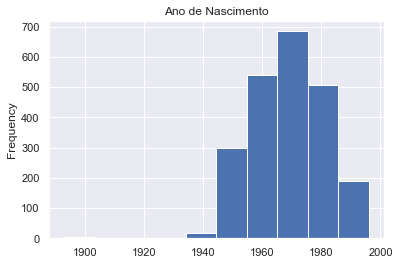

In [6]:
# Construindo Histograma para visualizar a distribuição dos dados
df['Year_Birth'].plot.hist(title = "Ano de Nascimento", xlabel = "Ano", ylabel = "Frequencia")

In [7]:
# Dividindo os clientes por década de nascimento, para melhor visualização da distriubuição. 
# Criando variável provisória para facilitar a geração do gráfico
Decade_Birth = []
for i in range(0,len(df)):
            if df.iloc[i,1] >= 1990:
                   Decade_Birth.append(90)
            elif df.iloc[i,1] >= 1980:
                   Decade_Birth.append(80)
            elif df.iloc[i,1] >= 1970:
                   Decade_Birth.append(70)
            elif df.iloc[i,1] >= 1960:
                   Decade_Birth.append(60)
            elif df.iloc[i,1] >= 1950:
                   Decade_Birth.append(50)
            elif df.iloc[i,1] >= 1940:
                   Decade_Birth.append(40)
            elif df.iloc[i,1] >= 1930:
                   Decade_Birth.append(30)
            elif df.iloc[i,1] >= 1920:
                   Decade_Birth.append(20)
            elif df.iloc[i,1] >= 1910:
                   Decade_Birth.append(10)
            else:
                   Decade_Birth.append(0)
                    
df['Decade_Birth'] = Decade_Birth

<AxesSubplot:title={'center':'Nascidos por Década'}, xlabel='Década', ylabel='Frequência'>

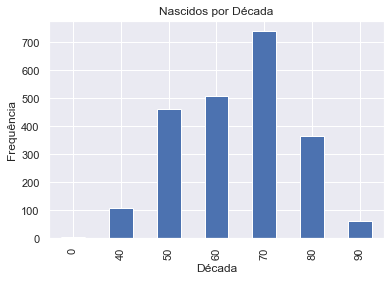

In [8]:
# Construção de gráfico de barras pela frequência de nascidos por década
dec = df.groupby('Decade_Birth').size()
dec.plot.bar(title = "Nascidos por Década",xlabel ='Década', ylabel = 'Frequência')

#### Indetifcamos alguns clientes com ano de nascimento menor que 1910

In [9]:
#Filtrando pelos clientes que nasceram antes de 1910
df[df['Year_Birth']<=1910]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Decade_Birth
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26,99,15,...,0,0,0,0,0,1,3,11,0,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17,23,8,...,0,0,0,0,0,0,3,11,0,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26,36,755,...,0,0,1,0,0,0,3,11,0,0


#### Temos 3 Clientes com anos de nascimento entre 1893 e 1900, o que aparenta ser um erro, visto que eles teriam mais de 122 anos. Nesse caso é indicado ou a exclusão da observação, ou a substituição do valor pela média. Vamos prosseguir com a substituição para não perdermos as demais informações

#### Observando o gráfico e as métricas da variável, conseguimos verificar que a maior parte dos clientes nasceu na década de 1970, e que em média nasceram no ano de 1968, possuindo por volta de 54 anos, sendo o mais novo dessa base nascido no ano de 1996.

In [10]:
# Substituindo os valores extremos pela média
df.loc[(df['Year_Birth']<1901), 'Year_Birth'] = df['Year_Birth'].mean()

In [11]:
# Atualizando a classificação depois de substituir os dados extremos pela média
# Dividindo os clientes por década de nascimento, para melhor visualização da distriubuição. 
# Criando variável provisória para facilitar a geração do gráfico
Decade_Birth = []
for i in range(0,len(df)):
            if df.iloc[i,1] >= 1990:
                   Decade_Birth.append(90)
            elif df.iloc[i,1] >= 1980:
                   Decade_Birth.append(80)
            elif df.iloc[i,1] >= 1970:
                   Decade_Birth.append(70)
            elif df.iloc[i,1] >= 1960:
                   Decade_Birth.append(60)
            elif df.iloc[i,1] >= 1950:
                   Decade_Birth.append(50)
            elif df.iloc[i,1] >= 1940:
                   Decade_Birth.append(40)
            elif df.iloc[i,1] >= 1930:
                   Decade_Birth.append(30)
            elif df.iloc[i,1] >= 1920:
                   Decade_Birth.append(20)
            elif df.iloc[i,1] >= 1910:
                   Decade_Birth.append(10)
            else:
                   Decade_Birth.append(0)
                    
df['Decade_Birth'] = Decade_Birth

### Education (Escolaridade)

In [12]:
#Verificando a frequência por nível de escolaridade
Educ = df.groupby(['Education']).size()
Educ

Education
2n Cycle       203
Basic           54
Graduation    1127
Master         370
PhD            486
dtype: int64

<AxesSubplot:title={'center':'Frequência por Nível de Escolaridade'}, xlabel='Escolaridade', ylabel='Frequência'>

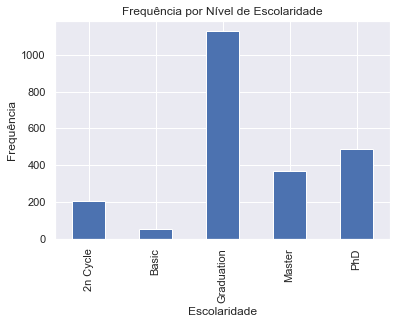

In [13]:
#Construindo Gráfico de Barras por nível de Escolaridade
Educ.plot.bar(title = 'Frequência por Nível de Escolaridade', xlabel = 'Escolaridade', ylabel= 'Frequência')

In [14]:
#Verificando o percentual da frequência por nível de escolaridade
(Educ/(Educ.sum()))*100

Education
2n Cycle       9.062500
Basic          2.410714
Graduation    50.312500
Master        16.517857
PhD           21.696429
dtype: float64

#### Com o apoio do gráfico e da tabela, podemos observar que a maioria dos clientes (50,31%) possuem Graduação, e se agruparmos os clientes que possuem Graduação, Mestrado e Doutorado, temos 88,52% , deixando clientes que ainda não possuem algum ensino superior como 11,48% do total da base.

### Marital_Status (Estado Civil)

In [15]:
#Verificando a distribuição de frequência por Estado Civil
MS = df.groupby('Marital_Status').size()
MS

Marital_Status
Absurd        2
Alone         3
Divorced    232
Married     864
Single      480
Together    580
Widow        77
YOLO          2
dtype: int64

In [16]:
MS/sum(MS)*100

Marital_Status
Absurd       0.089286
Alone        0.133929
Divorced    10.357143
Married     38.571429
Single      21.428571
Together    25.892857
Widow        3.437500
YOLO         0.089286
dtype: float64

<AxesSubplot:title={'center':'Frequência por Estado Civil'}, xlabel='Estado Civil', ylabel='Frequência'>

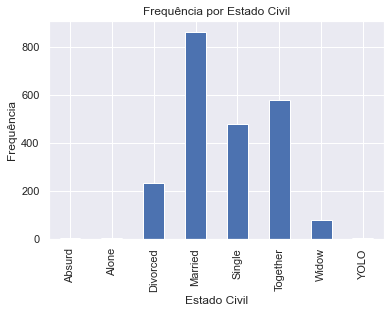

In [17]:
#Construindo gráfico de barras da frequência por estado civil
MS.plot.bar(title = 'Frequência por Estado Civil', xlabel = 'Estado Civil', ylabel = 'Frequência')

#### 38,57% da base de clientes é casado e 25,89% está junto, dessa forma temos que 64,46% da base de clientes possui um estado civil em que estão juntos com outra pessoa, 21,43% estão solteiros e 10,5% estão divorciados.

## Income (Renda Familiar Anual)

In [18]:
# Verificação da tabela de métricas da Renda Familiar Anual
df['Income'].describe()

count      2216.000000
mean      52247.251354
std       25173.076661
min        1730.000000
25%       35303.000000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

In [19]:
# Verificando Observações sem resposta
df[df['Income'].isna()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Decade_Birth
10,1994,1983.0,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,0,0,0,0,0,0,3,11,0,80
27,5255,1986.0,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,0,0,0,0,0,0,3,11,0,80
43,7281,1959.0,PhD,Single,NaN,0,0,2013-11-05,80,81,...,0,0,0,0,0,0,3,11,0,50
48,7244,1951.0,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,0,0,0,0,0,0,3,11,0,50
58,8557,1982.0,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,0,0,0,0,0,0,3,11,0,80
71,10629,1973.0,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,0,0,0,0,0,0,3,11,0,70
90,8996,1957.0,PhD,Married,NaN,2,1,2012-11-19,4,230,...,0,0,0,0,0,0,3,11,0,50
91,9235,1957.0,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,0,0,0,0,0,0,3,11,0,50
92,5798,1973.0,Master,Together,NaN,0,0,2013-11-23,87,445,...,0,0,0,0,0,0,3,11,0,70
128,8268,1961.0,PhD,Married,NaN,0,1,2013-07-11,23,352,...,0,0,0,0,0,0,3,11,0,60


#### São observações que apenas não informaram o a renda familia anual, dessa forma vamos substituir a renda familiar pela média, para não perdermos as outras informações disponibilizadas

In [20]:
# Substituindo as informações faltantes de Renda Familiar Anual pela média da variável
media_Income = df['Income'].mean()
df['Income']= df['Income'].fillna(media_Income)

In [21]:
# Criando faixas de salário mínimo para melhor visualização da distribuição dos dados no gráfico
# Criação de variável provisória no df
Range_Income = []
for i in range(0,len(df)):
    if df['Income'][i] <= 12120:
        Range_Income.append(1)
    elif df['Income'][i] <= (12120*2):
        Range_Income.append(2)
    elif df['Income'][i] <= (12120*3):
        Range_Income.append(3)
    elif df['Income'][i] <= (12120*4):
        Range_Income.append(4)
    elif df['Income'][i] <= (12120*5):
        Range_Income.append(5)
    elif df['Income'][i] <= (12120*6):
        Range_Income.append(6)
    elif df['Income'][i] <= (12120*7):
        Range_Income.append(7)
    elif df['Income'][i] <= (12120*8):
        Range_Income.append(8)
    else:
        Range_Income.append('+8')

df['Range_Income']=Range_Income

<AxesSubplot:title={'center':'Renda Familiar por Salário Mínimo '}, xlabel='Faixa de Renda Familiar por Salário Mínimo', ylabel='Frequência'>

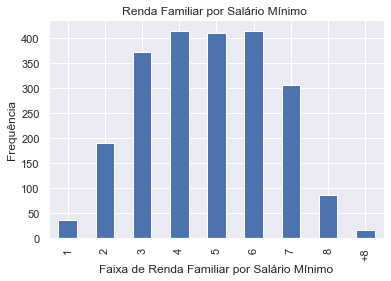

In [22]:
# Construção de gráfico de barras da frequência por faixa de renda familiar
df.groupby('Range_Income').size().plot.bar(title = 'Renda Familiar por Salário Mínimo ',
                                           xlabel= 'Faixa de Renda Familiar por Salário Mínimo',
                                          ylabel = 'Frequência')

In [23]:
# Tabela com a distriubuição de frequência por faixa de salário mínimo
Inc = df.groupby('Range_Income').size()
Inc

Range_Income
1      35
2     190
3     372
4     413
5     409
6     414
7     306
8      86
+8     15
dtype: int64

In [24]:
# Tabela com o percentual da frequência
(Inc/Inc.sum())*100

Range_Income
1      1.562500
2      8.482143
3     16.607143
4     18.437500
5     18.258929
6     18.482143
7     13.660714
8      3.839286
+8     0.669643
dtype: float64

#### Com o auxílio do gráfico e das tabelas é possível observar que a maior parte dos clientes da base (85,45%) tem renda familiar anual entre 3 e 7 salário mínimos.
#### A média está entre 4 e 5 salários mínimos, assim como a mediana, sendo esta um pouco menor, o que deve acontecer devido a alguns valores extremos.

### Kidhome (Quantidade de Crianças em Casa)

In [25]:
# Tabela de frequência da quantiade de crianças em casa
df.groupby('Kidhome').size()

Kidhome
0    1293
1     899
2      48
dtype: int64

<AxesSubplot:title={'center':'Quantidade de Crianças em Casa '}, xlabel='Quantidade', ylabel='Frequência'>

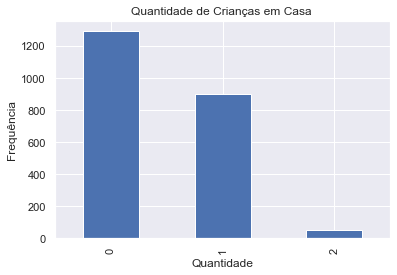

In [26]:
#Contrução do gráfico de frquência da quantidade de crianças em casa
df.groupby('Kidhome').size().plot.bar(title = 'Quantidade de Crianças em Casa ',
                                           xlabel= 'Quantidade',
                                          ylabel = 'Frequência')

#### Com o áuxilio do Gráfico e da tabela é possível ver que 42,2% dos clientes possuem crianças em casa, sendo 40,1% com uma criança e apenas 2,1% com duas crianças

### Teenhome (Quantidade de adolescentes em casa)

In [27]:
#Tabela de frequência da quantidade de adolescentes em casa
df.groupby('Teenhome').size()

Teenhome
0    1158
1    1030
2      52
dtype: int64

<AxesSubplot:title={'center':'Quantidade de Adolescentes em Casa '}, xlabel='Quantidade', ylabel='Frequência'>

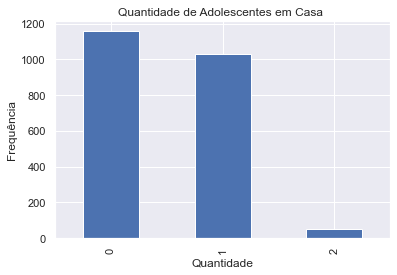

In [28]:
#Construção do gráfico de frequência da quantidade de adolescentes em casa
df.groupby('Teenhome').size().plot.bar(title = 'Quantidade de Adolescentes em Casa ',
                                           xlabel= 'Quantidade',
                                          ylabel = 'Frequência')

#### Temos aqui que 48,3% dos clientes possuem adolescentes em casa, 45,98% com apenas um adolescente e 2,32% com dois.

### Possui Criança e Adolescente em Casa

In [29]:
# Criação de variável para verificar quantos clientes possuem crianças e/ou adolescentes em casa
KandT = []
for i in range(0, len(df)):
    if (df['Kidhome'][i] > 0) & (df['Teenhome'][i] > 0 ):
        KandT.append("Possui os dois")
    elif(df['Kidhome'][i] > 0) | (df['Teenhome'][i] > 0 ):
        KandT.append("Possui apenas um")
    else:
        KandT.append("Não Possui")
df['KandT'] = KandT

In [30]:
# Tabela de frequência dos clientes que possuem crianças e/ou adolescentes em casa
df.groupby('KandT').size()

KandT
Não Possui           638
Possui apenas um    1175
Possui os dois       427
dtype: int64

<AxesSubplot:title={'center':'Possui Criança e Adolescente em Casa '}, xlabel='Quantidade', ylabel='Frequência'>

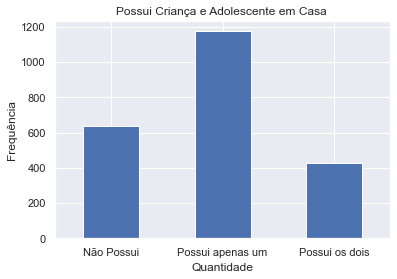

In [31]:
#COnstrução do gráfico de barras
df.groupby('KandT').size().plot.bar(title = 'Possui Criança e Adolescente em Casa ',
                                           xlabel= 'Quantidade',
                                          ylabel = 'Frequência', rot=0)

#### 52,45% dos clientes possuem pelo menos uma criança ou pelo menos um adolescente em casa, enquanto 19,06% possui pelo menos uma criança e pelo menos um adolescente em casa, os clientes que não possuem nem criança e nem adolescente em casa correspondem a  28,49%. Assim é possível concluir que 71,51% da base possui um menor de idade em casa.

### Dt_Customer (Data de inscrição no app)

<AxesSubplot:xlabel='Dt_Customer'>

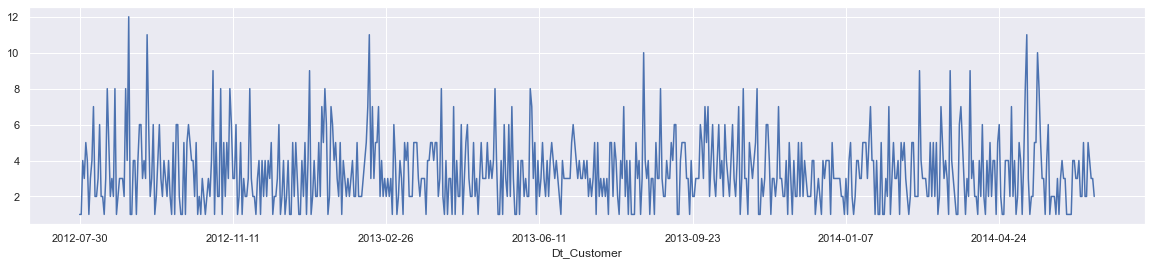

In [32]:
df.groupby('Dt_Customer').size().plot(figsize=(20,4))

In [33]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [34]:
df['Dt_Customer'].max()

Timestamp('2014-06-29 00:00:00')

In [35]:
df[df['Dt_Customer']>'2013-12-31']["ID"]

1        2174
3        6182
4        5324
9        5899
23       4047
        ...  
2224     4286
2229    10084
2236     4001
2237     7270
2238     8235
Name: ID, Length: 557, dtype: int64

In [36]:
df['Dt_Customer'][1].month

3

In [37]:
#Separando os dados por Semestre, para entender melhor a distribuição
Sem_Cust = []
for i in range(0, len(df)):
    if (df['Dt_Customer'][i].year == 2012) & (df['Dt_Customer'][i].month >6):
        Sem_Cust.append("2012/02")
    elif (df['Dt_Customer'][i].year == 2013) & (df['Dt_Customer'][i].month <=6):
        Sem_Cust.append("2013/01")
    elif (df['Dt_Customer'][i].year == 2013) & (df['Dt_Customer'][i].month >6):
        Sem_Cust.append("2013/02")
    else:
        Sem_Cust.append('2014/01')
df['sem_cust'] = Sem_Cust

In [38]:
df.groupby(['sem_cust']).size()

sem_cust
2012/02    494
2013/01    593
2013/02    596
2014/01    557
dtype: int64

In [39]:
(df.groupby(['sem_cust']).size())/(df.groupby(['sem_cust']).size().sum())*100

sem_cust
2012/02    22.053571
2013/01    26.473214
2013/02    26.607143
2014/01    24.866071
dtype: float64

<AxesSubplot:title={'center':'Semestre de Cadastro'}, xlabel='Semestre', ylabel='Frequência'>

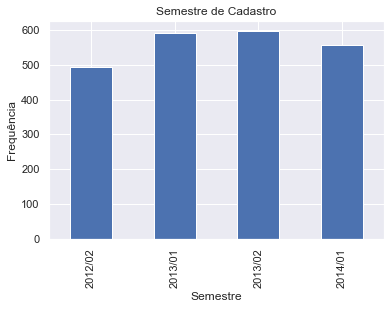

In [40]:
df.groupby(['sem_cust']).size().plot.bar(title = 'Semestre de Cadastro', xlabel = 'Semestre', ylabel= "Frequência")

#### A distribuição de cadastros por semestre é bem similar entre os clientes da base, como é possível ver no gráfico e nas tabelas de frequência. Os semestres do ano de 2013 foram os que tiveram o maior número de cadastros 2013/02 (596) e 2013/01 (593)

In [41]:
month =[]
for i in range(0,len(df)):
    month.append(df['Dt_Customer'][i].month)
df['month'] = month

<AxesSubplot:xlabel='month'>

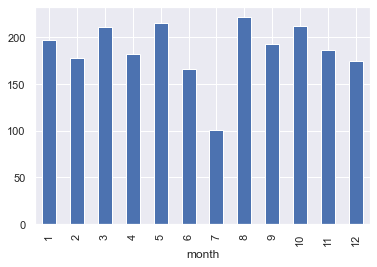

In [42]:
df.groupby('month').size().plot.bar()

### Recency (Quantidade de dias desde a última compra)

In [43]:
# Tabela de métricas da quantidade de dias desde a última compra
df['Recency'].describe()

count    2240.000000
mean       49.109375
std        28.962453
min         0.000000
25%        24.000000
50%        49.000000
75%        74.000000
max        99.000000
Name: Recency, dtype: float64

<AxesSubplot:ylabel='Frequency'>

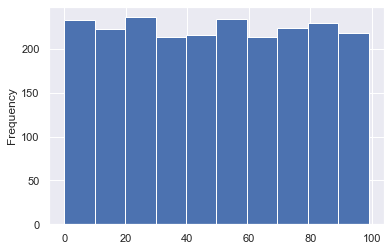

In [44]:
#Criação de histograma para verificar a distribuição dos dados
df['Recency'].plot.hist()

#### Os dados são similarmente distribuidos, melhor a criação de faixar para melhor visualização

In [45]:
# Criação de variável provisória para melhor visualização da distribuição dos dados da variável
Recency_Groups = []
for i in range(0, len(df)):
    if df['Recency'][i] == 0:
        Recency_Groups.append("Ontem")
    elif df['Recency'][i] <=7:
        Recency_Groups.append("Até 1 Semana")
    elif df['Recency'][i] <=14:
        Recency_Groups.append("Até 2 Semanas")
    elif df['Recency'][i] <=30:
        Recency_Groups.append("Até 1 Mês")
    elif df['Recency'][i] <=60:
        Recency_Groups.append("Até 2 Meses")
    elif df['Recency'][i] <=90:
        Recency_Groups.append("Até 3 Meses")
    else:
        Recency_Groups.append("Mais de 3 Meses")
df['Recency_Groups'] = Recency_Groups

In [46]:
# Organização do indice para as barras ficarem organizadas no gráfico
Rec = df.groupby('Recency_Groups').size().reset_index()
list = [3,1,4,2,5,6,0]
Rec['index'] = list
Rec.columns = ['Tempo', 'Frequencia', 'index']
Rec.set_index('index', inplace = True)
Rec.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(Rec['Frequencia'][i]/sum(Rec['Frequencia'])*100,1) for i in range(0,len(Rec))]
Rec['%'] = list1
Rec

,Tempo,Frequencia,%
index,,,
0,Ontem,28,1.2
1,Até 1 Semana,156,7.0
2,Até 2 Semanas,171,7.6
3,Até 1 Mês,369,16.5
4,Até 2 Meses,654,29.2
5,Até 3 Meses,664,29.6
6,Mais de 3 Meses,198,8.8


<AxesSubplot:title={'center':'Tempo desde a última compra'}, xlabel='Tempo', ylabel='Frequência'>

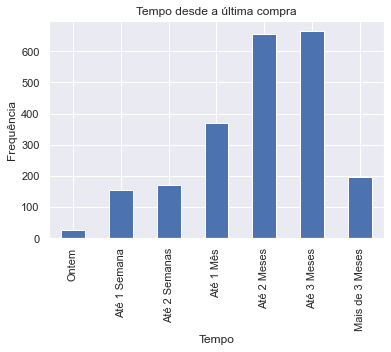

In [47]:
# Construção do gráfico de barras
Rec.plot.bar(x= 'Tempo', y = 'Frequencia',title = "Tempo desde a última compra", xlabel = 'Tempo', ylabel="Frequência",
            legend = False)

#### Com o auxílio do gráfico e da tabela é possível observar que a maioria dos clientes realizou a última compra em até 3 meses, sendo que 32,2% realizaram a última compra nos últimos 30 dias destes, 184 (8,2%) na última semana. 29,2% realizaram a compra entre 31 e 60 dias, 29,6% de 61 a 90 dias e 8,8% realizaram sua última compra há mais de 3 meses. A média de dias da última compra é de 49 dias, que tem o mesmo valor da mediana, dessa forma temos que metade dos clientes realizaram sua compra até esse prazo.

## MntWines (Valor gasto com vinhos nos últimos 2 anos)

In [48]:
# Tabela das métricas da variável
df['MntWines'].describe()

count    2240.000000
mean      303.935714
std       336.597393
min         0.000000
25%        23.750000
50%       173.500000
75%       504.250000
max      1493.000000
Name: MntWines, dtype: float64

<AxesSubplot:title={'center':'Gasto Acumulado com Vinho nos Últimos 2 anos'}, ylabel='Frequency'>

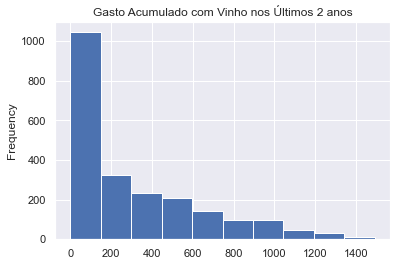

In [49]:
# Construção de Histograma
df['MntWines'].plot.hist(title="Gasto Acumulado com Vinho nos Últimos 2 anos")

In [50]:
# Criação de variável provisória, para melhor visualização dos dados em faixas de gasto.
wines = []
for i in range(0,len(df)):
    if df['MntWines'][i] == 0:
        wines.append("Não Compraram")
    elif df['MntWines'][i]<=300:
        wines.append("Até 300")
    elif df['MntWines'][i]<=600:
        wines.append("300 à 600")
    elif df['MntWines'][i]<=900:
        wines.append("600 à 900")
    elif df['MntWines'][i]<=1200:
        wines.append("900 à 1200")
    else:
        wines.append("Acima de 1200")
df['wines'] = wines

In [51]:
# Organização do indice para as barras ficarem organizadas no gráfico
wines = df.groupby('wines').size().reset_index()
list = [2,3,4,5,1,0]
wines['index'] = list
wines.columns = ['Gasto', 'Frequencia', 'index']
wines.set_index('index', inplace = True)
wines.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(wines['Frequencia'][i]/sum(wines['Frequencia'])*100,1) for i in range(0,len(wines))]
wines['%'] = list1
wines

,Gasto,Frequencia,%
index,,,
0,Não Compraram,13,0.6
1,Até 300,1358,60.6
2,300 à 600,444,19.8
3,600 à 900,246,11.0
4,900 à 1200,137,6.1
5,Acima de 1200,42,1.9


<AxesSubplot:title={'center':'Gastos com vinhos nos últimos 2 anos'}, xlabel='Gasto', ylabel='Frequência'>

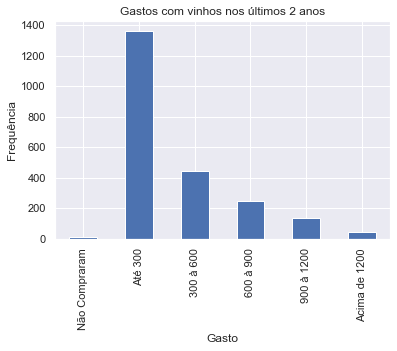

In [52]:
# Construção de gráfico de barros pelas faixas de gasto
wines.plot.bar(x= 'Gasto', y = 'Frequencia',title = "Gastos com vinhos nos últimos 2 anos", xlabel = 'Gasto',
               ylabel="Frequência",legend = False)

#### A média de gastos com vinho é de 303,93 reais, enquanto a mediana é de 173,50, com isso já podemos supor que existe uma parcela pequena dos clientes que possuem um gasto muito superior a média. Observando o gráfico e a tabela nota-se que mais da metade dos clientes (60,6%) gastaram até 300 reais com vinhos nos últimos 2 anos, 19,8% gastaram de 300 a 600, 11% gastaram entre 600 e 900 reais o que corresponde a um gasto de 2 a 3 vezes o valor da média, 8% gastaram mais do que 3 vezes a média, enquanto apenas 0,6% dos clientes não tiveram gastos com vinhos nos últimos 2 anos.
#### O gasto acumulado com vinho nos últimos dois anos foi de 680.816 reais, o que equivale a aproximadamente 28.367 reais por mês em vinhos.

### MntFruits (Gasto acumulado com frutas nos últimos 2 anos)

In [53]:
# Tabela de métricasda variável
df['MntFruits'].describe()

count    2240.000000
mean       26.302232
std        39.773434
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       199.000000
Name: MntFruits, dtype: float64

<AxesSubplot:title={'center':'Gasto Acumulado com Frutas nos Últimos 2 anos'}, ylabel='Frequency'>

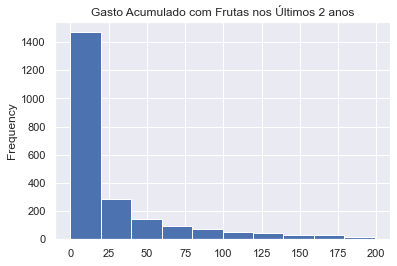

In [54]:
# Histograma dos gastos com frutas nos últimos 2 anos
df['MntFruits'].plot.hist(title="Gasto Acumulado com Frutas nos Últimos 2 anos")

In [55]:
# Criação de faixas de gastos para melhor visualização da distribuição dos dados
fruits = []
for i in range(0,len(df)):
    if df['MntFruits'][i] == 0:
        fruits.append("Não Compraram")
    elif df['MntFruits'][i] <= 40:
        fruits.append("Até 40")
    elif df['MntFruits'][i] <= 80:
        fruits.append("40 a 80")
    elif df['MntFruits'][i] <= 120:
        fruits.append("80 a 120")
    elif df['MntFruits'][i] <= 160:
        fruits.append("120 a 160")
    else:
        fruits.append("Acima de 160")
df['fruits'] = fruits

In [56]:
# Organização do indice para as barras ficarem organizadas no gráfico
fruits = df.groupby('fruits').size().reset_index()
list = [4,2,3,5,1,0]
fruits['index'] = list
fruits.columns = ['Gasto', 'Frequencia', 'index']
fruits.set_index('index', inplace = True)
fruits.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(fruits['Frequencia'][i]/sum(fruits['Frequencia'])*100,1) for i in range(0,len(fruits))]
fruits['%'] = list1
fruits

,Gasto,Frequencia,%
index,,,
0,Não Compraram,400,17.9
1,Até 40,1360,60.7
2,40 a 80,247,11.0
3,80 a 120,118,5.3
4,120 a 160,72,3.2
5,Acima de 160,43,1.9


<AxesSubplot:title={'center':'Gastos com Frutas nos últimos 2 anos'}, xlabel='Gasto', ylabel='Frequência'>

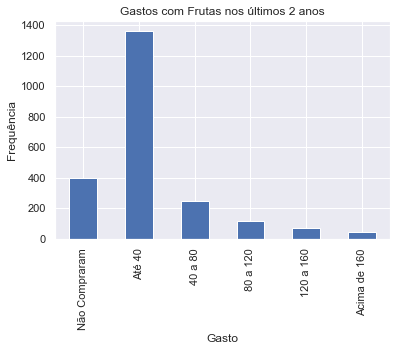

In [57]:
# COnstrução do gráfico de barros por faixa de gasto com frutas
fruits.plot.bar(x= 'Gasto', y = 'Frequencia',title = "Gastos com Frutas nos últimos 2 anos", xlabel = 'Gasto',
               ylabel="Frequência",legend = False)

#### O Gasto acumulado médio com frutas nos últimos 2 anos é de 26,3 reais, porém temos um gasto máximo nesse período de 199, o que corresponde a quase 8 vezes o valor da média. Contudo é algo atípico, visto que apenas 10,4% dos clientes tiveram gastos acima de 80 reais e os  75% dos clientes que menos gastaram, tiveram gasto até 33 reais, que é um valor bem próximo a média. 

#### O gasto com frutas ainda não é algo generalizada, visto que quase 1/5 (17,9%) da base não realizou nenhum gasto com esse produto no período.

#### O Gasto total com frutas da base nesses dois anos foi de 58.917, o que corresponde a 2454,87 por mês, o que equivale a um gasto de aproximadamente 1 real por cliente com frutas ao longo de cada mês.

### MntMeatProducts (Gasto acumulado com Carne)

In [58]:
#Tabela de métricas da variável
df['MntMeatProducts'].describe()

count    2240.000000
mean      166.950000
std       225.715373
min         0.000000
25%        16.000000
50%        67.000000
75%       232.000000
max      1725.000000
Name: MntMeatProducts, dtype: float64

<AxesSubplot:title={'center':'Gasto Acumulado com Carne nos Últimos 2 anos'}, ylabel='Frequency'>

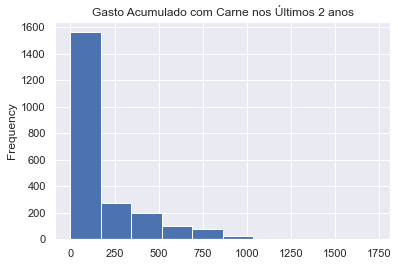

In [59]:
# Histograma do gasto acumulado com carne nos últimos 2 anos
df['MntMeatProducts'].plot.hist(title ="Gasto Acumulado com Carne nos Últimos 2 anos")

In [60]:
# Separação em faixas de gastos, para melhor visualização da distribuição dos dados
meats = []
for i in range(0,len(df)):
    if df['MntMeatProducts'][i] == 0:
        meats.append("Não Compraram")
    elif df["MntMeatProducts"][i] <=300:
        meats.append("Até 300")
    elif df["MntMeatProducts"][i] <=600:
        meats.append("300 a 600")
    elif df["MntMeatProducts"][i] <=900:
        meats.append("600 a 900")
    elif df["MntMeatProducts"][i] <=1200:
        meats.append("900 a 1200")
    else:
        meats.append("Acima de 1200")
df['meats'] = meats

In [61]:
# Organização do indice para as barras ficarem organizadas no gráfico
meats = df.groupby('meats').size().reset_index()
list = [2,3,4,5,1,0]
meats['index'] = list
meats.columns = ['Gasto', 'Frequencia', 'index']
meats.set_index('index', inplace = True)
meats.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(meats['Frequencia'][i]/sum(meats['Frequencia'])*100,1) for i in range(0,len(meats))]
meats['%'] = list1
meats

,Gasto,Frequencia,%
index,,,
0,Não Compraram,1,0.0
1,Até 300,1795,80.1
2,300 a 600,298,13.3
3,600 a 900,121,5.4
4,900 a 1200,20,0.9
5,Acima de 1200,5,0.2


<AxesSubplot:title={'center':'Gasto com Carne nos últimos 2 anos'}, xlabel='Gasto', ylabel='Frequência'>

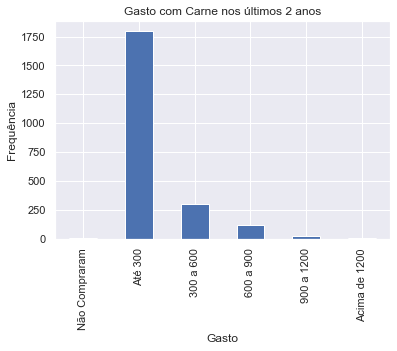

In [62]:
# Gráfico de barras dos gastos com carne
meats.plot.bar(x= 'Gasto', y = 'Frequencia',title = "Gasto com Carne nos últimos 2 anos", xlabel = 'Gasto',
               ylabel="Frequência",legend = False)

#### Todos os clientes da base realizaram pelo menos uma compra referente a um produto com carne ao longo desses dois anos, sendo o único produto do estudo com tal comportamento. A média de gastos é de 166,95, sendo o maior gasto acumulado nesses dois anos 1725 reais. 75% da base que menos gastou, teve um gasto máximo de 232.

#### O gasto acumulado da base com carne ao longo desse período foi de 373.968, o que corresponde a um gasto da base de 15.582 por mês, ou seja aproximadamente 7 reais por clientes a cada mês.

### MntFishProducts (Gasto acumulado com Peixe no últimos 2 anos)

In [63]:
# Tabela de métricas da variável
df["MntFishProducts"].describe()

count    2240.000000
mean       37.525446
std        54.628979
min         0.000000
25%         3.000000
50%        12.000000
75%        50.000000
max       259.000000
Name: MntFishProducts, dtype: float64

<AxesSubplot:title={'center':'Gasto Acumulado com Peixe nos Últimos 2 anos'}, ylabel='Frequency'>

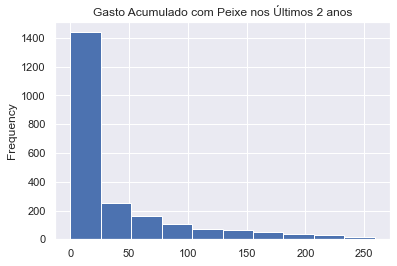

In [64]:
# Histograma do gasto acumulado com peixe nos últimos 2 anos
df['MntFishProducts'].plot.hist(title="Gasto Acumulado com Peixe nos Últimos 2 anos")

In [65]:
# Separação em faixas de gasto para melhor visualização dos dados
fish = []
for i in range(0, len(df)):
    if df['MntFishProducts'][i]==0:
        fish.append("Não Compraram")
    elif df['MntFishProducts'][i] <= 50:
        fish.append("até 50")
    elif df['MntFishProducts'][i]<=100:
        fish.append("50 a 100")
    elif df['MntFishProducts'][i] <=150:
        fish.append("100 a 150")
    elif df['MntFishProducts'][i] <= 200:
        fish.append("150 a 200")
    else:
        fish.append("Acima de 200")
df['fish'] = fish

In [66]:
# Organização do indice para as barras ficarem organizadas no gráfico
fish = df.groupby('fish').size().reset_index()
list = [3,4,2,5,0,1]
fish['index'] = list
fish.columns = ['Gasto', 'Frequencia', 'index']
fish.set_index('index', inplace = True)
fish.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(fish['Frequencia'][i]/sum(fish['Frequencia'])*100,1) for i in range(0,len(fish))]
fish['%'] = list1
fish

,Gasto,Frequencia,%
index,,,
0,Não Compraram,384,17.1
1,até 50,1306,58.3
2,50 a 100,262,11.7
3,100 a 150,142,6.3
4,150 a 200,86,3.8
5,Acima de 200,60,2.7


<AxesSubplot:title={'center':'Gastos com Peixe nos últimos 2 anos'}, xlabel='Gasto', ylabel='Frequência'>

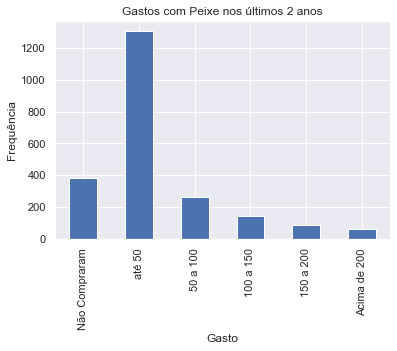

In [67]:
# Construção do gráfico de barras por faixa de gastos
fish.plot.bar(x= 'Gasto', y = 'Frequencia',title = "Gastos com Peixe nos últimos 2 anos", xlabel = 'Gasto',
               ylabel="Frequência",legend = False)

#### A média dos gastos com peixe nos últimos 2 anos foi de 37,52, sendo que 17,1% da base não realizou nenhum gasto com peixe nesse período e 50% dos clientes que gastaram menos, tiveram um gasto médio de 12 reais, ou seja, 50 centavos por mês nesse período. Apenas 12,8% gastaram mais que 100 reais nesse período, sendo o maior gasto acumulado 259 reais.

#### O gasto acumulado da base nesse período foi de 84.057, o que dá um gasto por mês de 3502,37, equivalente a aproximadamente 1,50 gasto por cliente com peixe por mês.

### MntSweetProducts (Gasto acumulado com Doces em 2 anos)

In [68]:
#Tabela de métricas da variável
df['MntSweetProducts'].describe()

count    2240.000000
mean       27.062946
std        41.280498
min         0.000000
25%         1.000000
50%         8.000000
75%        33.000000
max       263.000000
Name: MntSweetProducts, dtype: float64

<AxesSubplot:title={'center':'Gasto Acumulado com Doce nos Últimos 2 anos'}, ylabel='Frequency'>

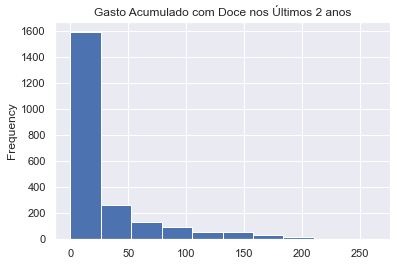

In [69]:
#Histograma do gasto acumulado com doces nos últimos 2 anos
df['MntSweetProducts'].plot.hist(title="Gasto Acumulado com Doce nos Últimos 2 anos")

In [70]:
# Separação por faixas de gasto para melhor visualização da distribuição de dados
sweet = []
for i in range(0,len(df)):
    if df['MntSweetProducts'][i] == 0:
        sweet.append("Não Compraram")
    elif df['MntSweetProducts'][i] <= 50:
        sweet.append("até 50")
    elif df['MntSweetProducts'][i] <= 100:
        sweet.append("50 a 100")
    elif df['MntSweetProducts'][i]<=150:
        sweet.append("100 a 150")
    elif df['MntSweetProducts'][i] <=200:
        sweet.append("150 a 200")
    else:
        sweet.append("Acima de 200")
df['sweet'] = sweet

In [71]:
# Organização do indice para as barras ficarem organizadas no gráfico
sweet = df.groupby('sweet').size().reset_index()
list = [3,4,2,5,0,1]
sweet['index'] = list
sweet.columns = ['Gasto', 'Frequencia', 'index']
sweet.set_index('index', inplace = True)
sweet.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(sweet['Frequencia'][i]/sum(sweet['Frequencia'])*100,1) for i in range(0,len(sweet))]
sweet['%'] = list1
sweet

,Gasto,Frequencia,%
index,,,
0,Não Compraram,419,18.7
1,até 50,1423,63.5
2,50 a 100,218,9.7
3,100 a 150,118,5.3
4,150 a 200,60,2.7
5,Acima de 200,2,0.1


<AxesSubplot:title={'center':'Gastos com Doce nos últimos 2 anos'}, xlabel='Gasto', ylabel='Frequência'>

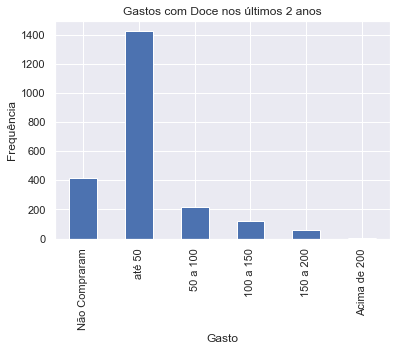

In [72]:
# COnstrução do gráfico de barras
sweet.plot.bar(x= 'Gasto', y = 'Frequencia',title = "Gastos com Doce nos últimos 2 anos", xlabel = 'Gasto',
               ylabel="Frequência",legend = False)

#### O maior gasto acumulado com doces nesse período foi de 263 reais, sendo que apenas 2 clientes tiveram gastos acumulados superiores a 200 reais. O Percentual de clientes que gastaram mais que 50 reais, que é 2 vezes maior que a média dos gastos (27,06), é de 17,8%, menor que a quantidade de pessoas que não realizaram nenhum gasto com doce (18,7%).

#### O gasto da base acumulado com doces no período foi de 60.621, o que corresponde a um gasto por mês de 2.525,87, equivalente a aproximadamente 1 real por cliente gasto com doce por mês.

### MntGoldProds (Gasto acumulado com produtos Gold nos últimos 2 anos)

In [73]:
#Tabela de métricas
df['MntGoldProds'].describe()

count    2240.000000
mean       44.021875
std        52.167439
min         0.000000
25%         9.000000
50%        24.000000
75%        56.000000
max       362.000000
Name: MntGoldProds, dtype: float64

<AxesSubplot:title={'center':'Gasto Acumulado com Produtos Gold nos Últimos 2 anos'}, ylabel='Frequency'>

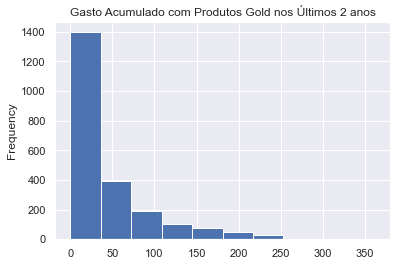

In [74]:
#Histograma do gasto acumulado com produtos gold nos últimos 2 anos
df['MntGoldProds'].plot.hist(title="Gasto Acumulado com Produtos Gold nos Últimos 2 anos")

In [75]:
#Separação em faixas de gastos para melhor visualização dos dados
gold = []
for i in range(0,len(df)):
    if df['MntGoldProds'][i] == 0:
        gold.append("Não Compraram")
    elif df['MntGoldProds'][i] <=70:
        gold.append("Até 70")
    elif df['MntGoldProds'][i] <= 140:
        gold.append("70 a 140")
    elif df['MntGoldProds'][i] <= 210:
        gold.append("140 a 210")
    elif df['MntGoldProds'][i] <= 280:
        gold.append("210 a 280")
    else:
        gold.append("Acima de 280")
df['gold'] = gold

In [76]:
# Organização do indice para as barras ficarem organizadas no gráfico
gold = df.groupby('gold').size().reset_index()
list = [3,4,2,5,1,0]
gold['index'] = list
gold.columns = ['Gasto', 'Frequencia', 'index']
gold.set_index('index', inplace = True)
gold.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(gold['Frequencia'][i]/sum(gold['Frequencia'])*100,1) for i in range(0,len(gold))]
gold['%'] = list1
gold

,Gasto,Frequencia,%
index,,,
0,Não Compraram,61,2.7
1,Até 70,1717,76.7
2,70 a 140,291,13.0
3,140 a 210,136,6.1
4,210 a 280,32,1.4
5,Acima de 280,3,0.1


<AxesSubplot:title={'center':'Gastos com Produtos Gold nos últimos 2 anos'}, xlabel='Gasto', ylabel='Frequência'>

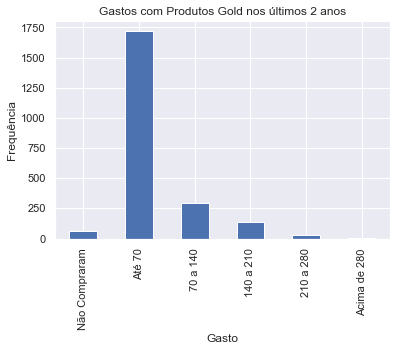

In [77]:
#Construção do gráfico de barras
gold.plot.bar(x= 'Gasto', y = 'Frequencia',title = "Gastos com Produtos Gold nos últimos 2 anos", xlabel = 'Gasto',
               ylabel="Frequência",legend = False)

#### A média de gastos acumulados com produtos gold nos últimos 2 anos foi de aproximadamente 44 reais, sendo que 75% dos clientes que menos gastaram, tiveram um gasto acumulado máximo de 56 reais. 20,6% dos clientes realizaram gastos acumulados acima de 70 reais, sendo o maior gasto 362, que corresponde a mais de 8 vezes o valor da média.

#### O gasto acumulado da base nesses período foi de 98.609, o que corresponde 4.108,70 por mês, cerca de 1,83 por cliente a cada mês.

### NumDealsPurchases (Número de compras feitas com desconto)

In [78]:
#Tabela de métricas da variável
df['NumDealsPurchases'].describe()

count    2240.000000
mean        2.325000
std         1.932238
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        15.000000
Name: NumDealsPurchases, dtype: float64

<AxesSubplot:title={'center':'Número de Compras Feitas com Desconto'}, ylabel='Frequency'>

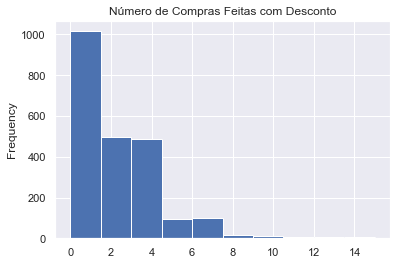

In [79]:
# Histograma do número de compras feitas com desconto
df['NumDealsPurchases'].plot.hist(title = 'Número de Compras Feitas com Desconto')

In [80]:
# Separação em faixas de compras realizadas com desconto
deals = []
for i in range(0, len(df)):
    if df['NumDealsPurchases'][i] == 0:
        deals.append("Não Compraram")
    elif df['NumDealsPurchases'][i] <=3:
        deals.append("1 a 3")
    elif df['NumDealsPurchases'][i] <=6:
        deals.append("4 a 6")
    elif df['NumDealsPurchases'][i] <=9:
        deals.append("7 a 9")
    elif df['NumDealsPurchases'][i] <=12:
        deals.append("10 a 12")
    elif df['NumDealsPurchases'][i] <=15:
        deals.append("13 a 15")
df['deals'] = deals

In [81]:
# Organização do indice para as barras ficarem organizadas no gráfico
deals = df.groupby('deals').size().reset_index()
list = [1,4,5,2,3,0]
deals['index'] = list
deals.columns = ['Compras', 'Frequencia', 'index']
deals.set_index('index', inplace = True)
deals.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(deals['Frequencia'][i]/sum(deals['Frequencia'])*100,1) for i in range(0,len(deals))]
deals['%'] = list1
deals

,Compras,Frequencia,%
index,,,
0,Não Compraram,46,2.1
1,1 a 3,1764,78.8
2,4 a 6,344,15.4
3,7 a 9,62,2.8
4,10 a 12,14,0.6
5,13 a 15,10,0.4


<AxesSubplot:title={'center':'Compras com Desconto'}, xlabel='Compras', ylabel='Frequência'>

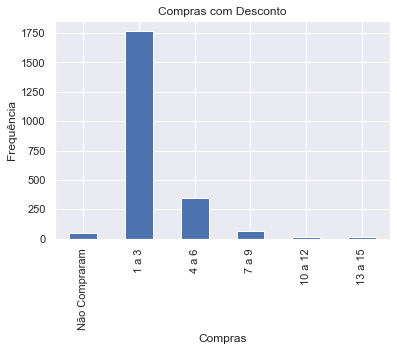

In [82]:
# Construção gráfico de barras das faixas de compras com desconto 
deals.plot.bar(x= 'Compras', y = 'Frequencia',title = "Compras com Desconto", xlabel = 'Compras',
               ylabel="Frequência",legend = False)

#### Em média foram realizadas 2,32 compras com desconto por cliente, sendo que 78,8% da base realizou no máximo 3 compras desse tipo e 2,1% não fizeram nenhuma compra com desconto. Apenas 1% da base, 24 clientes realizaram 10 ou mais compras com desconto, sendo 15 o número máximo de compras com desconto que alguém da base conseguiu efetuar.

#### Foram realizadas um total de 5208 compras com desconto.

### NumWebPurchases (Número de Compras Feitas Pelo Site)


In [83]:
#Tabela de métricas da variável
df['NumWebPurchases'].describe()

count    2240.000000
mean        4.084821
std         2.778714
min         0.000000
25%         2.000000
50%         4.000000
75%         6.000000
max        27.000000
Name: NumWebPurchases, dtype: float64

<AxesSubplot:title={'center':'Quantidade de Compras Feitas Pelo Site'}, ylabel='Frequency'>

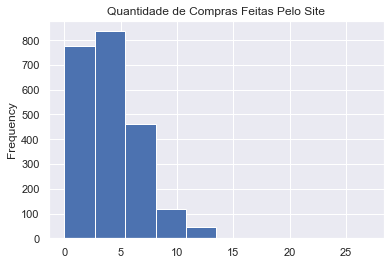

In [84]:
#Histograma da quantidade de compras feitas pelo site
df['NumWebPurchases'].plot.hist(title = "Quantidade de Compras Feitas Pelo Site")

In [85]:
#Separação em faixas de quantidade de compras para melhor visualização dos dados
web = []
for i in range(0,len(df)):
    if df['NumWebPurchases'][i] == 0:
        web.append("Não Compraram")
    elif df['NumWebPurchases'][i] <=5:
        web.append("Até 5")
    elif df['NumWebPurchases'][i] <=10:
        web.append("6 a 10")
    else:
        web.append("Acima de 11")
df['web'] = web

In [86]:
# Organização do indice para as barras ficarem organizadas no gráfico
web = df.groupby('web').size().reset_index()
list = [2,3,1,0]
web['index'] = list
web.columns = ['Compras', 'Frequencia', 'index']
web.set_index('index', inplace = True)
web.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(web['Frequencia'][i]/sum(web['Frequencia'])*100,1) for i in range(0,len(web))]
web['%'] = list1
web

,Compras,Frequencia,%
index,,,
0,Não Compraram,49,2.2
1,Até 5,1563,69.8
2,6 a 10,580,25.9
3,Acima de 11,48,2.1


<AxesSubplot:title={'center':'Quantidade de Compras Feitas Pelo Site'}, xlabel='Compras', ylabel='Frequência'>

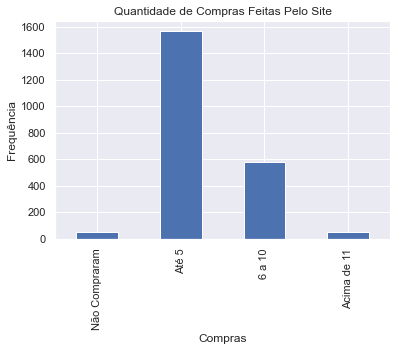

In [87]:
#Construção do gráfico de barras
web.plot.bar(x= 'Compras', y = 'Frequencia',title = "Quantidade de Compras Feitas Pelo Site", xlabel = 'Compras',
               ylabel="Frequência",legend = False)

#### 2,2% dos clientes nunca realizaram uma compra pelo site, enquanto na média cada cliente da base realizou aproximadamente 4 compras pelo site da empresa. Temos uma concetração dos dados, onde os 75% que fizeram menos compras pelo site, realizaram no máximo 6 compras, sendo aquele que fizeram até 5 a maioria (69,8%), e apenas 2,1% realizaram mais de 11 compras pelo site.

#### Ao todo foram realizadas 9150 compras utilizando o site da empresa

### NumCatalogPurchases (Número de Compras Usando o Catálogo)

In [88]:
#Tabela de Métricas da Variável
df['NumCatalogPurchases'].describe()

count    2240.000000
mean        2.662054
std         2.923101
min         0.000000
25%         0.000000
50%         2.000000
75%         4.000000
max        28.000000
Name: NumCatalogPurchases, dtype: float64

<AxesSubplot:title={'center':'Compras Feitas Pelo Catálogo'}, ylabel='Frequency'>

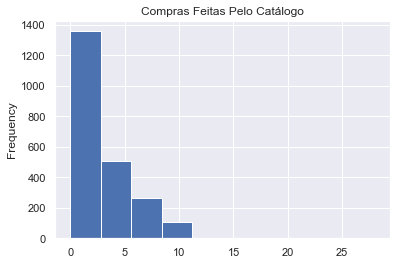

In [89]:
#Histograma de compras feitas pelo catálogo
df['NumCatalogPurchases'].plot.hist(title = "Compras Feitas Pelo Catálogo")

In [90]:
#Separação em faixas de compras para melhor visualização dos dados
catalog = []
for i in range(0,len(df)):
    if df['NumCatalogPurchases'][i] == 0:
        catalog.append("Não Compraram")
    elif df['NumCatalogPurchases'][i] <=5:
        catalog.append("Até 5")
    elif df['NumCatalogPurchases'][i] <=10:
        catalog.append("6 a 10")
    else:
        catalog.append("Acima de 11")
df['catalog'] = catalog

In [91]:
# Organização do indice para as barras ficarem organizadas no gráfico
catalog= df.groupby('catalog').size().reset_index()
list = [2,3,1,0]
catalog['index'] = list
catalog.columns = ['Compras', 'Frequencia', 'index']
catalog.set_index('index', inplace = True)
catalog.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(catalog['Frequencia'][i]/sum(catalog['Frequencia'])*100,1) for i in range(0,len(catalog))]
catalog['%'] = list1
catalog

,Compras,Frequencia,%
index,,,
0,Não Compraram,586,26.2
1,Até 5,1279,57.1
2,6 a 10,352,15.7
3,Acima de 11,23,1.0


<AxesSubplot:title={'center':'Compras Feitas Pelo Catálogo'}, xlabel='Compras', ylabel='Frequência'>

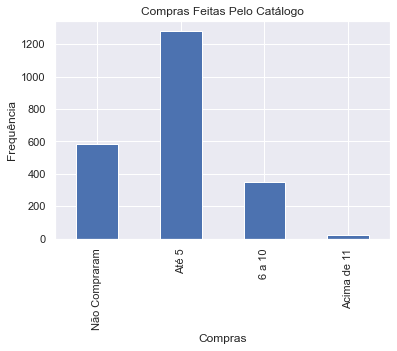

In [92]:
# Construção do Gráfico de Barras
catalog.plot.bar(x= 'Compras', y = 'Frequencia',title = "Compras Feitas Pelo Catálogo", xlabel = 'Compras',
               ylabel="Frequência",legend = False)

#### Mais de 1/4 (26,2%) dos nossos clientes não realizaram compras pelo catálogo e mais da metade (57,1%) fizeram até 5 compras. A média de compras por cliente é de 2,66 e o cliente que fez mais compras pelo catálogo realizou 28 o que é quase 14 vezes maior que a média, mas apenas 16,7% dos clientes realizaram 6 ou mais compras.

#### Ao todo foram realizadas 5.963 compras utilizando o catálogo

### NumStorePurchases (Número de Compras Feitas Diretamente na Loja)

In [93]:
#Tabela de métricas da Variável
df['NumStorePurchases'].describe()

count    2240.000000
mean        5.790179
std         3.250958
min         0.000000
25%         3.000000
50%         5.000000
75%         8.000000
max        13.000000
Name: NumStorePurchases, dtype: float64

<AxesSubplot:title={'center':'Compras Feitas Diretamente da Loja'}, ylabel='Frequency'>

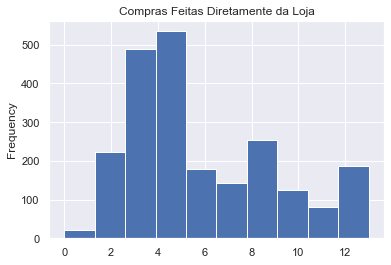

In [94]:
# Histograma das compras feitas diretamente da loja
df['NumStorePurchases'].plot.hist(title = "Compras Feitas Diretamente da Loja")

In [95]:
# Separação por faixas de quantidade de compraspara melhor visualização dos dados
store = []
for i in range(0,len(df)):
    if df['NumStorePurchases'][i] == 0:
        store.append("Não Compraram")
    elif df['NumStorePurchases'][i] <=3:
        store.append("Até 3")
    elif df['NumStorePurchases'][i]<= 6:
        store.append("4 a 6")
    elif df['NumStorePurchases'][i] <= 9:
        store.append("7 a 9")
    else:
        store.append("10 ou mais")
df['store'] = store

In [96]:
# Organização do indice para as barras ficarem organizadas no gráfico
store= df.groupby('store').size().reset_index()
list = [4,2,3,1,0]
store['index'] = list
store.columns = ['Compras', 'Frequencia', 'index']
store.set_index('index', inplace = True)
store.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(store['Frequencia'][i]/sum(store['Frequencia'])*100,1) for i in range(0,len(store))]
store['%'] = list1
store

,Compras,Frequencia,%
index,,,
0,Não Compraram,15,0.7
1,Até 3,720,32.1
2,4 a 6,713,31.8
3,7 a 9,398,17.8
4,10 ou mais,394,17.6


<AxesSubplot:title={'center':'Compras Feitas Diretamente da Loja'}, xlabel='Compras', ylabel='Frequência'>

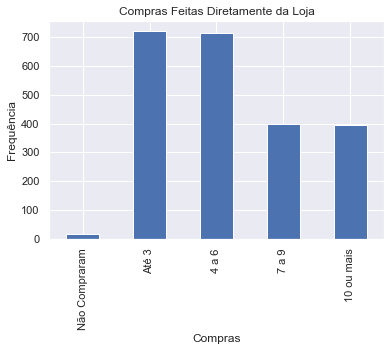

In [97]:
# Construção do Gráfico de Barras
store.plot.bar(x= 'Compras', y = 'Frequencia',title = "Compras Feitas Diretamente da Loja", xlabel = 'Compras',
               ylabel="Frequência",legend = False)

#### Em média os clientes realizam 5,79 compras diretamente da loja, sendo que 75% da base realizou no máximo 8 compras, 32,1% fizeram até 3 e 31,8% realizaram entre 4 e 6. O cliente que mais realizou compras diretamente da loja fez 13, mas apenas 17,6% da base realizaram 10 ou mais compras.

#### Ao todo foram realizadas 12.970 compras diretamente da loja

### NumWebVisitsMonth (Número de Visitas no Site no Último Mês)

In [98]:
#Tabela de Métricas da Variável
df['NumWebVisitsMonth'].describe()

count    2240.000000
mean        5.316518
std         2.426645
min         0.000000
25%         3.000000
50%         6.000000
75%         7.000000
max        20.000000
Name: NumWebVisitsMonth, dtype: float64

<AxesSubplot:title={'center':'Número de Visitas no Site no Último Mês'}, ylabel='Frequency'>

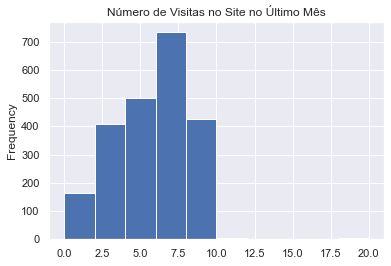

In [99]:
#Histograma da quantidade de visitas no site no último mês
df['NumWebVisitsMonth'].plot.hist(title = "Número de Visitas no Site no Último Mês")

In [100]:
#Separação em faixas de quantidade de vistias para melhor visualização dos dados
visit = []
for i in range(0, len(df)):
    if df['NumWebVisitsMonth'][i] ==0:
        visit.append("Não Visitaram")
    elif df['NumWebVisitsMonth'][i] <= 3:
        visit.append("Até 3")
    elif df['NumWebVisitsMonth'][i] <= 6:
        visit.append("3 a 6")
    elif df['NumWebVisitsMonth'][i] <= 9:
        visit.append("6 a 9")
    else:
        visit.append("Mais de 9")
df['visit'] = visit

In [101]:
# Organização do indice para as barras ficarem organizadas no gráfico
visit= df.groupby('visit').size().reset_index()
list = [2,3,1,4,0]
visit['index'] = list
visit.columns = ['Compras', 'Frequencia', 'index']
visit.set_index('index', inplace = True)
visit.sort_index(inplace=True)

#Criação de coluna com o percentual da frequência
list1 = [round(visit['Frequencia'][i]/sum(visit['Frequencia'])*100,1) for i in range(0,len(visit))]
visit['%'] = list1
visit

,Compras,Frequencia,%
index,,,
0,Não Visitaram,11,0.5
1,Até 3,560,25.0
2,3 a 6,839,37.5
3,6 a 9,818,36.5
4,Mais de 9,12,0.5


<AxesSubplot:title={'center':'Número de Visitas no Site no Último Mês'}, xlabel='Visitas', ylabel='Frequência'>

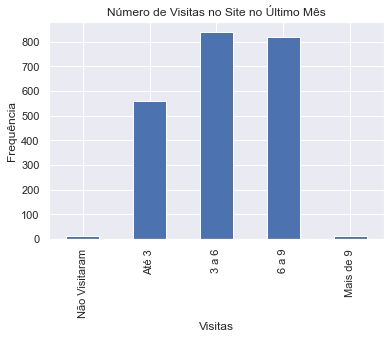

In [102]:
visit.plot.bar(x= 'Compras', y = 'Frequencia',title = "Número de Visitas no Site no Último Mês", xlabel = 'Visitas',
               ylabel="Frequência",legend = False)

#### Em média os clientes realizaram 5,31 visitas ao site da empresa no último mês, sendo que 11 (0,5%) não realizaram nenhuma visita, quantidade próxima aos do que visitaram mais de 9 vezes (12 clientes). Pelo histograma é possível ver uma concentração muito grande dos clientes que realizaram até 7 visitas.

#### Foram realizadas um total de 11.909 visitas ao site da empresa.

### AcceptedCmp1 (Clientes que Participaram da 1ª campanha - 0:Não 1:Sim)

In [103]:
# Tabela para entender a frequência das repostas
df.groupby('AcceptedCmp1').size()

AcceptedCmp1
0    2096
1     144
dtype: int64

In [104]:
# Organização dos dados para colocar a legenda no gráfico
cmp1= df.groupby('AcceptedCmp1').size().reset_index()
cmp1.columns = ['Participou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
cmp1.loc[(cmp1['Participou']==0), 'Participou'] = 'Não'
cmp1.loc[(cmp1['Participou']==1), 'Participou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(cmp1['Frequencia'][i]/sum(cmp1['Frequencia'])*100,1) for i in range(0,len(cmp1))]
cmp1['%'] = list1
cmp1

,Participou,Frequencia,%
0,Não,2096,93.6
1,Sim,144,6.4


<AxesSubplot:title={'center':'Quantidade de Clientes que Participaram da 1ª Campanha'}, xlabel='Participou da Campanha', ylabel='Frequência'>

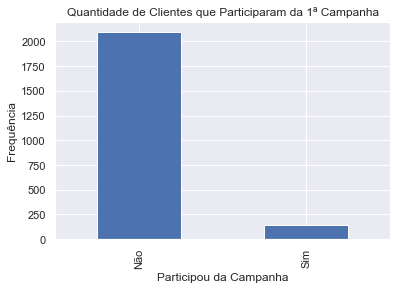

In [105]:
# Gráfico de barras
cmp1.plot.bar(x= 'Participou', y = 'Frequencia',title = "Quantidade de Clientes que Participaram da 1ª Campanha", xlabel = 'Participou da Campanha',
               ylabel="Frequência",legend = False)

#### Apenas 6,4% dos clientes participaram da primeira campanha

### AcceptedCmp2 (Clientes que Participaram da 2ª campanha - 0:Não 1:Sim)

In [106]:
# Tabela para entender a frequência das repostas
df.groupby('AcceptedCmp2').size()

AcceptedCmp2
0    2210
1      30
dtype: int64

In [107]:
# Organização dos dados para colocar a legenda no gráfico
cmp2= df.groupby('AcceptedCmp2').size().reset_index()
cmp2.columns = ['Participou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
cmp2.loc[(cmp2['Participou']==0), 'Participou'] = 'Não'
cmp2.loc[(cmp2['Participou']==1), 'Participou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(cmp2['Frequencia'][i]/sum(cmp2['Frequencia'])*100,1) for i in range(0,len(cmp2))]
cmp2['%'] = list1
cmp2

,Participou,Frequencia,%
0,Não,2210,98.7
1,Sim,30,1.3


<AxesSubplot:title={'center':'Quantidade de Clientes que Participaram da 2ª Campanha'}, xlabel='Participou da Campanha', ylabel='Frequência'>

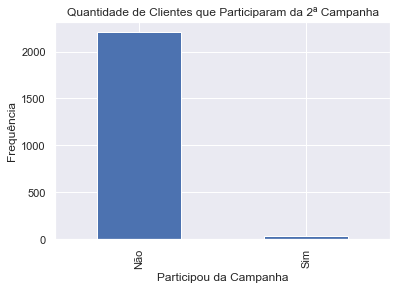

In [108]:
# Gráfico de barras
cmp2.plot.bar(x= 'Participou', y = 'Frequencia',title = "Quantidade de Clientes que Participaram da 2ª Campanha", xlabel = 'Participou da Campanha',
               ylabel="Frequência",legend = False)

#### Apenas 1,3% dos clientes participaram da segunda campanha

### AcceptedCmp3 (Clientes que Participaram da 3ª campanha - 0:Não 1:Sim)

In [109]:
# Tabela para entender a frequência das repostas
df.groupby('AcceptedCmp3').size()

AcceptedCmp3
0    2077
1     163
dtype: int64

In [110]:
# Organização dos dados para colocar a legenda no gráfico
cmp3= df.groupby('AcceptedCmp3').size().reset_index()
cmp3.columns = ['Participou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
cmp3.loc[(cmp3['Participou']==0), 'Participou'] = 'Não'
cmp3.loc[(cmp3['Participou']==1), 'Participou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(cmp3['Frequencia'][i]/sum(cmp3['Frequencia'])*100,1) for i in range(0,len(cmp3))]
cmp3['%'] = list1
cmp3

,Participou,Frequencia,%
0,Não,2077,92.7
1,Sim,163,7.3


<AxesSubplot:title={'center':'Quantidade de Clientes que Participaram da 3ª Campanha'}, xlabel='Participou da Campanha', ylabel='Frequência'>

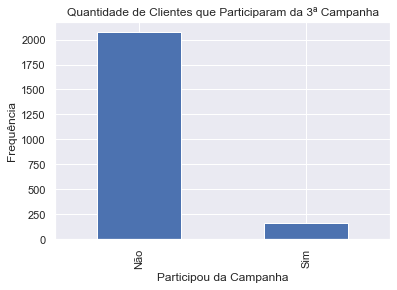

In [111]:
# Gráfico de barras
cmp3.plot.bar(x= 'Participou', y = 'Frequencia',title = "Quantidade de Clientes que Participaram da 3ª Campanha", xlabel = 'Participou da Campanha',
               ylabel="Frequência",legend = False)

#### 7,3% dos clientes participaram da terceira campanha

### AcceptedCmp4 (Clientes que Participaram da 4ª campanha - 0:Não 1:Sim)

In [112]:
# Tabela para entender a frequência das repostas
df.groupby('AcceptedCmp4').size()

AcceptedCmp4
0    2073
1     167
dtype: int64

In [113]:
# Organização dos dados para colocar a legenda no gráfico
cmp4= df.groupby('AcceptedCmp4').size().reset_index()
cmp4.columns = ['Participou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
cmp4.loc[(cmp4['Participou']==0), 'Participou'] = 'Não'
cmp4.loc[(cmp4['Participou']==1), 'Participou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(cmp4['Frequencia'][i]/sum(cmp4['Frequencia'])*100,1) for i in range(0,len(cmp4))]
cmp4['%'] = list1
cmp4

,Participou,Frequencia,%
0,Não,2073,92.5
1,Sim,167,7.5


<AxesSubplot:title={'center':'Quantidade de Clientes que Participaram da 4ª Campanha'}, xlabel='Participou da Campanha', ylabel='Frequência'>

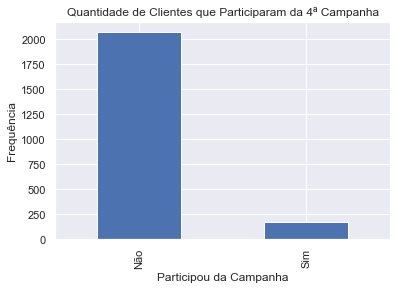

In [114]:
# Gráfico de barras
cmp4.plot.bar(x= 'Participou', y = 'Frequencia',title = "Quantidade de Clientes que Participaram da 4ª Campanha", xlabel = 'Participou da Campanha',
               ylabel="Frequência",legend = False)

#### 7,5% dos clientes participaram da quarta campanha

### AcceptedCmp5 (Clientes que Participaram da 5ª campanha - 0:Não 1:Sim)

In [115]:
# Tabela para entender a frequência das repostas
df.groupby('AcceptedCmp5').size()

AcceptedCmp5
0    2077
1     163
dtype: int64

In [116]:
# Organização dos dados para colocar a legenda no gráfico
cmp5= df.groupby('AcceptedCmp1').size().reset_index()
cmp5.columns = ['Participou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
cmp5.loc[(cmp5['Participou']==0), 'Participou'] = 'Não'
cmp5.loc[(cmp5['Participou']==1), 'Participou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(cmp5['Frequencia'][i]/sum(cmp5['Frequencia'])*100,1) for i in range(0,len(cmp5))]
cmp5['%'] = list1
cmp5

,Participou,Frequencia,%
0,Não,2096,93.6
1,Sim,144,6.4


<AxesSubplot:title={'center':'Quantidade de Clientes que Participaram da 5ª Campanha'}, xlabel='Participou da Campanha', ylabel='Frequência'>

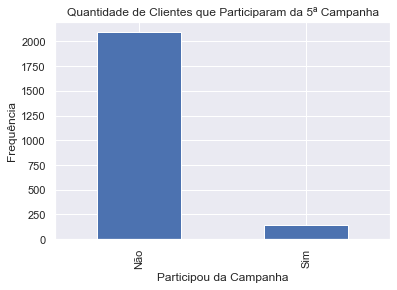

In [117]:
# Gráfico de barras
cmp5.plot.bar(x= 'Participou', y = 'Frequencia',title = "Quantidade de Clientes que Participaram da 5ª Campanha", xlabel = 'Participou da Campanha',
               ylabel="Frequência",legend = False)

#### Apenas 6,4% dos clientes participaram da quinta campanha

### Response (Clientes que Participaram da Última campanha - 0:Não 1:Sim)

In [118]:
# Tabela para entender a frequência das repostas
df.groupby('Response').size()

Response
0    1906
1     334
dtype: int64

In [119]:
# Organização dos dados para colocar a legenda no gráfico
cmp6= df.groupby('Response').size().reset_index()
cmp6.columns = ['Participou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
cmp6.loc[(cmp6['Participou']==0), 'Participou'] = 'Não'
cmp6.loc[(cmp6['Participou']==1), 'Participou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(cmp6['Frequencia'][i]/sum(cmp6['Frequencia'])*100,1) for i in range(0,len(cmp6))]
cmp6['%'] = list1
cmp6

,Participou,Frequencia,%
0,Não,1906,85.1
1,Sim,334,14.9


<AxesSubplot:title={'center':'Quantidade de Clientes que Participaram da Última Campanha'}, xlabel='Participou da Campanha', ylabel='Frequência'>

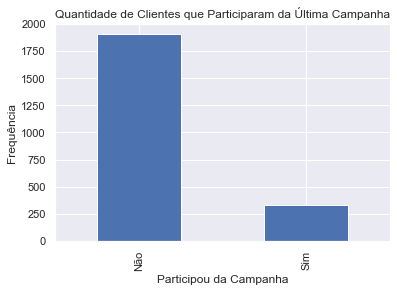

In [120]:
# Gráfico de barras
cmp6.plot.bar(x= 'Participou', y = 'Frequencia',title = "Quantidade de Clientes que Participaram da Última Campanha", xlabel = 'Participou da Campanha',
               ylabel="Frequência",legend = False)

#### 14,9% dos clientes participaram da quinta campanha

### Quantos clientes participaram de campanhas

In [121]:
#Crianco variável com a quantidade de campanhas que cada cliente participou dentre as 6
camp = []
for i in range(0,len(df)):
    if (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i]
        + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) == 0: 
        camp.append("Não Participou")
    elif (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i]
        + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) == 1: 
        camp.append("1")
    elif (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i]
          + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) == 2: 
        camp.append("2")
    elif (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i]
          + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) == 3: 
        camp.append("3")
    elif (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i]
          + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) == 4: 
        camp.append("4")
    elif (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i]
          + df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) == 5: 
        camp.append("5")
    else:
        camp.append('6')
df['camp'] = camp

In [122]:
# Tabela de frequência da quantidade de participações em campanhas
camp1 = df.groupby(['camp']).size()
camp1

camp
1                  370
2                  142
3                   51
4                   36
5                   10
Não Participou    1631
dtype: int64

In [123]:
# Tabela com o percentual da quantidade de participações em campanhas
camp1/sum(df.groupby('camp').size())*100

camp
1                 16.517857
2                  6.339286
3                  2.276786
4                  1.607143
5                  0.446429
Não Participou    72.812500
dtype: float64

<AxesSubplot:xlabel='camp'>

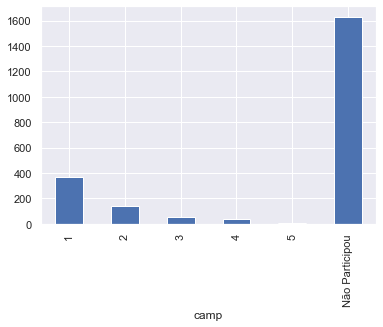

In [124]:
df.groupby(['camp']).size().plot.bar()

#### 27,2% da base já participou de pelo menos uma campanha, sendo que a maior concentração entre os que participaram (16,51%) participou de apenas uma campanha, enquanto 6,33% participaram de 2, 2,27% participou de 3 e 1,60% participou de 4, 0,44% de 5 e nenhum cliente participou de todas as 6 campanhas. 

### Complain ( Reclamação nos últimos dois anos)

In [125]:
# Tabela para entender a frequência das repostas
df.groupby('Complain').size()

Complain
0    2219
1      21
dtype: int64

In [126]:
# Organização dos dados para colocar a legenda no gráfico
com= df.groupby('Complain').size().reset_index()
com.columns = ['Reclamou', 'Frequencia']

#Substituindo 1 por Sim e 0 por Não
com.loc[(com['Reclamou']==0), 'Reclamou'] = 'Não'
com.loc[(com['Reclamou']==1), 'Reclamou'] = 'Sim'

#Criação de coluna com o percentual da frequência
list1 = [round(com['Frequencia'][i]/sum(com['Frequencia'])*100,1) for i in range(0,len(com))]
com['%'] = list1
com

,Reclamou,Frequencia,%
0,Não,2219,99.1
1,Sim,21,0.9


<AxesSubplot:title={'center':'Quantidade de Clientes que Reclamaram nos Últimos 2 anos'}, xlabel='Reclamou', ylabel='Frequência'>

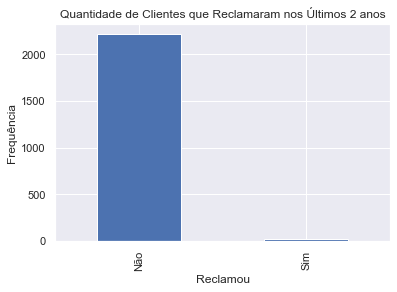

In [127]:
# Gráfico de barras
com.plot.bar(x= 'Reclamou', y = 'Frequencia',title = "Quantidade de Clientes que Reclamaram nos Últimos 2 anos", xlabel = 'Reclamou',
               ylabel="Frequência",legend = False)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

#### Apenas 21 clientes, 0,9% da base, realizaram alguma reclamação nos últimos 2 anos

### Correlação

In [129]:
#Removendo as colunas de constantes
df1.drop(df1.columns[[26,27]], axis=1, inplace=True)

In [130]:
# análise de correlação
correlation = df1.corr()

In [131]:
#Dividindo o df de correlação para melhor visualização do mapa de calor
corr1 = correlation.iloc[1:,[1,2,3,4,5,6,7,8]]
corr2 = correlation.iloc[1:,[9,10,11,12,13,14,15]]
corr3 = correlation.iloc[1:,[16,17,18,19,20,21,22,23]]

# Filtro por correlção moderada e forte
corr1[(corr1>=0.5) | (corr1 <=-0.5)]

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts
Year_Birth,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,1.000000,NaN,NaN,NaN,0.578650,NaN,0.584633
Kidhome,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
MntWines,NaN,0.578650,NaN,NaN,NaN,1.000000,NaN,0.562667
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,0.543105
MntMeatProducts,NaN,0.584633,NaN,NaN,NaN,0.562667,0.543105,1.000000
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,0.594804,0.568402
MntSweetProducts,NaN,NaN,NaN,NaN,NaN,NaN,0.567164,0.523846


In [132]:
# Filtro por correlção moderada e forte
corr2[(corr2>=0.5) | (corr2 <=-0.5)]

,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases
Year_Birth,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,NaN,NaN,NaN,NaN,NaN,0.589162,0.529362
Kidhome,NaN,NaN,NaN,NaN,NaN,-0.502237,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,NaN,NaN,0.542265,0.635226,0.642100
MntFruits,0.594804,0.567164,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,0.568402,0.523846,NaN,NaN,NaN,0.723827,NaN
MntFishProducts,1.000000,0.579870,NaN,NaN,NaN,0.534478,NaN
MntSweetProducts,0.579870,1.000000,NaN,NaN,NaN,NaN,NaN


In [133]:
# Filtro por correlção moderada e forte
corr3[(corr3>=0.5) | (corr3 <=-0.5)]

,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
Year_Birth,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Income,-0.553088,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Kidhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Teenhome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Recency,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntWines,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFruits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntMeatProducts,-0.539470,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntFishProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MntSweetProducts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Pegando as variáveis com corr >=|0.5|

#### Income com MntWines, MntMeatProducts, NumCatalogPurchases, NumStorePurchases, NumWebVisitsMonth
#### MntWines com MntMeatProducts, NumWebPurchases, NumCatalogPurchases, NumStorePurchases
#### MntFruits com MntMeatProducts, MntFishProducts, MntSweetProducts
#### MntFishProducts com MntMeatProducts, MntSweetProducts, NumCatalogPurchases
#### MntSweetProducts com  MntMeatProducts
#### NumWebPurchases com NumStorePurchases
#### NumCatalogPurchases com MntMeatProducts, NumStorePurchases, NumWebVisitsMonth
#### NumWebVisitsMonth com MntMeatProducts

## Análise Exploratória Bivariada
#### Para a análise exploratória bivariada, vamos utilizar apenas as variáveis em que as correlações foram moderadas ou altas

### Renda Familiar Anual x Gastos com Vinho

[Text(0.5, 1.0, 'Renda Familiar Anual x Gastos com Vinho'),
 Text(0.5, 0, 'Renda Familiar Anual (Salários Mínimos)'),
 Text(0, 0.5, 'Gastos com Vinho')]

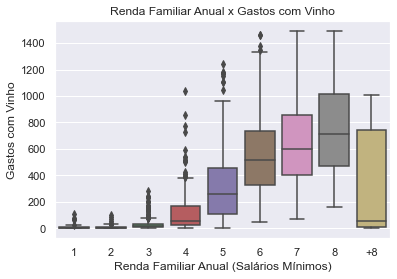

In [134]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
sns.boxplot(x = 'Range_Income', y = 'MntWines', data = df,showfliers = True, order=[1,2,3,4,5,6,7,8,"+8"]
           ).set(title = 'Renda Familiar Anual x Gastos com Vinho',
                xlabel = 'Renda Familiar Anual (Salários Mínimos)', ylabel = 'Gastos com Vinho')

[Text(0.5, 1.0, 'Renda Familiar Anual x Gastos com Vinho'),
 Text(0.5, 0, 'Renda Familiar Anual'),
 Text(0, 0.5, 'Gastos com Vinho')]

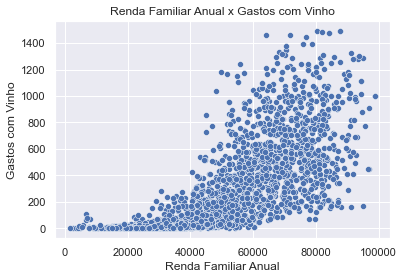

In [135]:
#Retirando os outliers de Renda Familiar Anual
df2 = df[df['Income']<100000]

# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'Income', y = 'MntWines', data = df2).set(title = 'Renda Familiar Anual x Gastos com Vinho',
                xlabel = 'Renda Familiar Anual', ylabel = 'Gastos com Vinho')

In [136]:
# Tabela Cruzada de Frequência
pd.crosstab(df['wines'], df['Range_Income'])

Range_Income,1,2,3,4,5,6,7,8,+8
wines,,,,,,,,,
300 à 600,0,0,0,29,113,171,106,25,0
600 à 900,0,0,0,3,43,95,85,18,2
900 à 1200,0,0,0,1,13,45,51,24,3
Acima de 1200,0,0,0,0,1,13,17,11,0
Até 300,32,182,370,380,239,90,47,8,10
Não Compraram,3,8,2,0,0,0,0,0,0


#### Com o auxílio dos gráficos e da tabela, é possível notar que quanto maior a renda familiar, maior o gasto com vinho, exceto quando a renda familiar é maior que 8 salários mínimos, onde a quantia gasta com vinhos permance deixa de crescer.

### Renda Familiar Anual x Gastos com Carne

[Text(0.5, 1.0, 'Renda Familiar Anual x Gastos com Carne'),
 Text(0.5, 0, 'Renda Familiar Anual (Salários Mínimos)'),
 Text(0, 0.5, 'Gastos com Carne')]

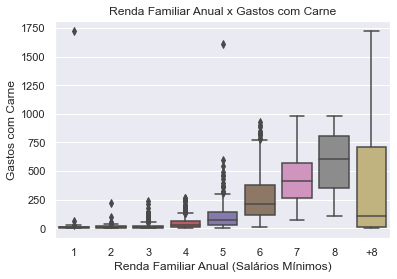

In [137]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
sns.boxplot(x = 'Range_Income', y = 'MntMeatProducts', data = df, showfliers = True, order=[1,2,3,4,5,6,7,8,"+8"]
           ).set(title = 'Renda Familiar Anual x Gastos com Carne',
                xlabel = 'Renda Familiar Anual (Salários Mínimos)', ylabel = 'Gastos com Carne')

[Text(0.5, 1.0, 'Renda Familiar Anual x Gastos com Carne'),
 Text(0.5, 0, 'Renda Familiar Anual'),
 Text(0, 0.5, 'Gastos com Carne')]

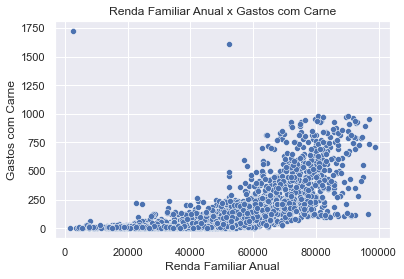

In [138]:
#Retirando os outliers de Renda Familiar Anual
df2 = df[df['Income']<100000]

# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'Income', y = 'MntMeatProducts', data = df2).set(title = 'Renda Familiar Anual x Gastos com Carne',
                xlabel = 'Renda Familiar Anual', ylabel = 'Gastos com Carne')

In [139]:
# Tabela Cruzada de Frequência
pd.crosstab(df['meats'], df['Range_Income'])

Range_Income,1,2,3,4,5,6,7,8,+8
meats,,,,,,,,,
300 a 600,0,0,0,0,16,114,143,24,1
600 a 900,0,0,0,0,0,24,60,35,2
900 a 1200,0,0,0,0,0,1,9,10,0
Acima de 1200,1,0,0,0,1,0,0,0,3
Até 300,33,190,372,413,392,275,94,17,9
Não Compraram,1,0,0,0,0,0,0,0,0


#### A quantia gasta com carne é similar entre os clientes que possuem renda familiar de 1 a 4 salários mínimos, tendo um leve aumento naqueles que possuem renda familiar de 5 salários mínimos e a partir dai o gasto com carne vai aumentando. O boxplot fica um pouco confuso, porém analisando o gráfico de dispersão é possível ver que o gasto continua similar ou ligeiramente maior.

### Renda Familiar Anual x Compras Usando o Catálogo

[Text(0.5, 1.0, 'Renda Familiar Anual x Compras Usando o Catálogo'),
 Text(0.5, 0, 'Renda Familiar Anual (Salários Mínimos)'),
 Text(0, 0.5, 'Compras usando o Catálogo')]

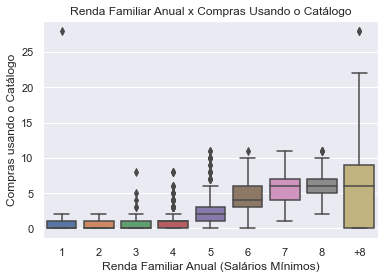

In [140]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
sns.boxplot(x = 'Range_Income', y = 'NumCatalogPurchases', data = df, showfliers = True, order=[1,2,3,4,5,6,7,8,"+8"]
           ).set(title = 'Renda Familiar Anual x Compras Usando o Catálogo',
                xlabel = 'Renda Familiar Anual (Salários Mínimos)', ylabel = 'Compras usando o Catálogo')

[Text(0.5, 1.0, 'Renda Familiar Anual x Compras usando o Catálogo'),
 Text(0.5, 0, 'Renda Familiar Anual'),
 Text(0, 0.5, 'Compras usando o Catálogo')]

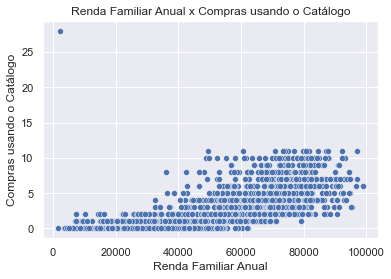

In [141]:
#Retirando os outliers de Renda Familiar Anual
df2 = df[df['Income']<100000]

# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'Income', y = 'NumCatalogPurchases', data = df2).set(title = 'Renda Familiar Anual x Compras usando o Catálogo',
                xlabel = 'Renda Familiar Anual', ylabel = 'Compras usando o Catálogo')

In [142]:
# Tabela Cruzada de Frequência
pd.crosstab(df['catalog'], df['Range_Income'])

Range_Income,1,2,3,4,5,6,7,8,+8
catalog,,,,,,,,,
6 a 10,0,0,1,6,32,111,144,52,6
Acima de 11,1,0,0,0,2,1,12,4,3
Até 5,14,68,135,254,327,300,150,30,1
Não Compraram,20,122,236,153,48,2,0,0,5


#### A quantiade de compras usando o catálogo é similar entredois grupos aqueles que ganham de 1 a 4 salários mínimos, e aquele que ganham 6 ou mais, aqueles que possuem renda de familiar de 5 salários mínimos fazem parte de uma transição tendo comportamentos similares aos dois grupos.

### Renda Familiar Anual x Compras Feitas Diretamente na Loja

[Text(0.5, 1.0, 'Renda Familiar Anual x Compras Feitas Diretamente na Loja'),
 Text(0.5, 0, 'Renda Familiar Anual (Salários Mínimos)'),
 Text(0, 0.5, 'Compras Feitas Diretamente na Loja')]

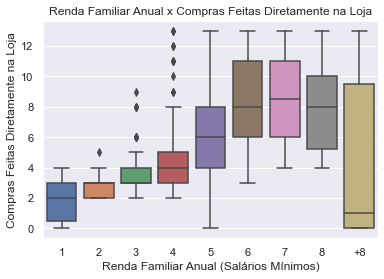

In [143]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
sns.boxplot(x = 'Range_Income', y = 'NumStorePurchases', data = df, showfliers = True, order=[1,2,3,4,5,6,7,8,"+8"]
           ).set(title = 'Renda Familiar Anual x Compras Feitas Diretamente na Loja',
                xlabel = 'Renda Familiar Anual (Salários Mínimos)', ylabel = 'Compras Feitas Diretamente na Loja')

[Text(0.5, 1.0, 'Renda Familiar Anual x Compras Feitas Diretamente na Loja'),
 Text(0.5, 0, 'Renda Familiar Anual'),
 Text(0, 0.5, 'Compras Feitas Diretamente na Loja')]

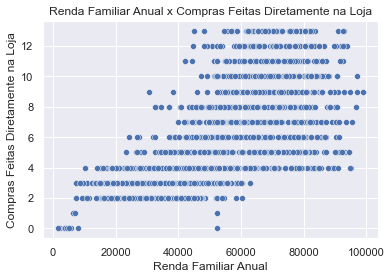

In [144]:
#Retirando os outliers de Renda Familiar Anual
df2 = df[df['Income']<100000]

# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'Income', y = 'NumStorePurchases', data = df2).set(title = 'Renda Familiar Anual x Compras Feitas Diretamente na Loja',
                xlabel = 'Renda Familiar Anual', ylabel = 'Compras Feitas Diretamente na Loja')

In [145]:
# Tabela Cruzada de Frequência
pd.crosstab(df['store'], df['Range_Income'])

Range_Income,1,2,3,4,5,6,7,8,+8
store,,,,,,,,,
10 ou mais,0,0,0,8,61,167,125,29,4
4 a 6,1,30,96,174,163,126,94,29,0
7 a 9,0,0,4,31,127,119,87,28,2
Até 3,25,160,272,200,57,2,0,0,4
Não Compraram,9,0,0,0,1,0,0,0,5


#### Quanto maior a renda familiar, maior a quantidade de compras realizadas diretamente nas lojas, tendo a existência de alguns outliers, porém nada que interfira no comportamento geral de cada faixa.

### Renda Familiar Anual x Número de Visitas no Site

[Text(0.5, 1.0, 'Renda Familiar Anual x Número de Visitas no Site'),
 Text(0.5, 0, 'Renda Familiar Anual (Salários Mínimos)'),
 Text(0, 0.5, 'Número de Visitas no Site')]

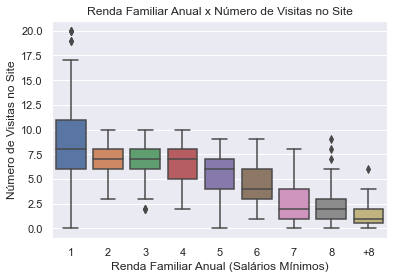

In [146]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
sns.boxplot(x = 'Range_Income', y = 'NumWebVisitsMonth', data = df, showfliers = True, order=[1,2,3,4,5,6,7,8,"+8"]
           ).set(title = 'Renda Familiar Anual x Número de Visitas no Site',
                xlabel = 'Renda Familiar Anual (Salários Mínimos)', ylabel = 'Número de Visitas no Site')

In [147]:
# Tabela Cruzada de Frequência
pd.crosstab(df['visit'], df['Range_Income'])

Range_Income,1,2,3,4,5,6,7,8,+8
visit,,,,,,,,,
3 a 6,8,56,130,162,205,183,80,13,2
6 a 9,15,129,229,229,146,57,10,3,0
Até 3,2,4,12,21,57,174,214,67,9
Mais de 9,9,1,1,1,0,0,0,0,0
Não Visitaram,1,0,0,0,1,0,2,3,4


#### Aqui temos uma correlação negativa, onde quanto maior a renda familiar, menor a quantidade de visitas ao site da empresa

### Gastos com Vinho x Gastos com Carne

[Text(0.5, 1.0, 'Gastos com Vinho x Gastos com Carne'),
 Text(0.5, 0, 'Faixas de Gastos com Vinho'),
 Text(0, 0.5, 'Gastos com Carne')]

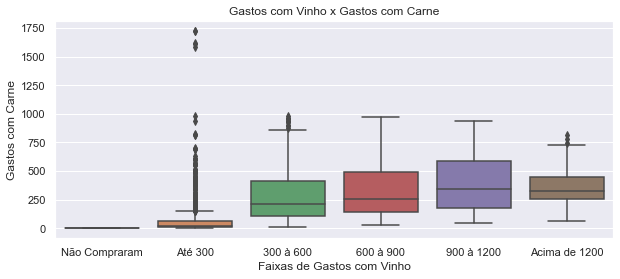

In [148]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'wines', y = 'MntMeatProducts', data = df,showfliers = True, order=["Não Compraram", "Até 300", "300 à 600",
                                                                                   "600 à 900", "900 à 1200", "Acima de 1200"]
           ).set(title = 'Gastos com Vinho x Gastos com Carne',
                xlabel = 'Faixas de Gastos com Vinho', ylabel = 'Gastos com Carne')

[Text(0.5, 1.0, 'Gastos com Vinho x Gastos com Carne'),
 Text(0.5, 0, 'Gastos com Vinho'),
 Text(0, 0.5, 'Gastos com Carne')]

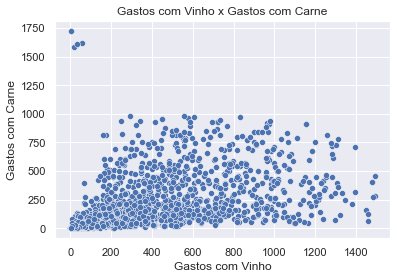

In [149]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntWines', y = 'MntMeatProducts', data = df).set(title = 'Gastos com Vinho x Gastos com Carne',
                xlabel = 'Gastos com Vinho', ylabel = 'Gastos com Carne')

In [150]:
# Tabela Cruzada de Frequência
pd.crosstab(df['wines'], df['meats'])

meats,300 a 600,600 a 900,900 a 1200,Acima de 1200,Até 300,Não Compraram
wines,,,,,,
300 à 600,114,44,7,0,279,0
600 à 900,77,31,6,0,132,0
900 à 1200,41,26,5,0,65,0
Acima de 1200,17,8,0,0,17,0
Até 300,49,12,2,5,1290,0
Não Compraram,0,0,0,0,12,1


#### Os clientes com gasto acumulados de té 300 reais com vinho, não gastam tanto com carne, porém quando observa-se a quantidade de gasto com vinho acima de 300, é possível notar também um aumento nos gastos com carne, sendo um gasto similar nas faixas de gastos de vinho acima dos 300 reais.

### Gastos com Vinho x Compras pelo Site

[Text(0.5, 1.0, 'Gastos com Vinho x Compras pelo Site'),
 Text(0.5, 0, 'Faixas de Gastos com Vinho'),
 Text(0, 0.5, 'Compras pelo Site')]

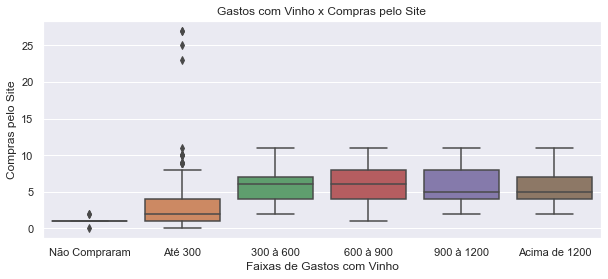

In [151]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'wines', y = 'NumWebPurchases', data = df,showfliers = True, order=["Não Compraram", "Até 300", "300 à 600",
                                                                                   "600 à 900", "900 à 1200", "Acima de 1200"]
           ).set(title = 'Gastos com Vinho x Compras pelo Site',
                xlabel = 'Faixas de Gastos com Vinho', ylabel = 'Compras pelo Site')

In [152]:
# Tabela Cruzada de Frequência
pd.crosstab(df['wines'], df['web'])

web,6 a 10,Acima de 11,Até 5,Não Compraram
wines,,,,
300 à 600,242,15,187,0
600 à 900,131,14,101,0
900 à 1200,49,12,76,0
Acima de 1200,16,2,24,0
Até 300,142,5,1163,48
Não Compraram,0,0,12,1


#### O comportamento aqui é similar ao da análise anterior, aqueles que possuem gastos acumulado com vinho até 300 reais, não realizam muitas compras pelo site da empresa, porém quando são observados os clientes que possuem gastos acumulados com vinho maiores do que 300 reais, observa-se que estes realizam mais compras pelo site.

### Gastos com Vinho x Compras usando o Catálogo

[Text(0.5, 1.0, 'Gastos com Vinho x Compras usando o Catálogo'),
 Text(0.5, 0, 'Faixas de Gastos com Vinho'),
 Text(0, 0.5, 'Compras usando o Catálogo')]

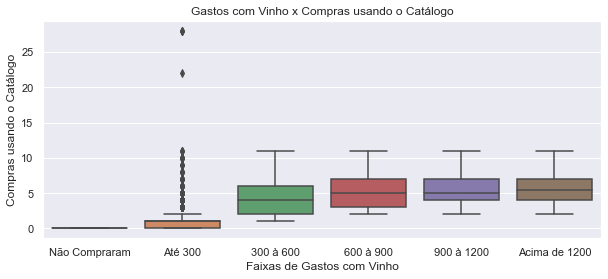

In [153]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'wines', y = 'NumCatalogPurchases', data = df,showfliers = True, order=["Não Compraram", "Até 300", "300 à 600",
                                                                                   "600 à 900", "900 à 1200", "Acima de 1200"]
           ).set(title = 'Gastos com Vinho x Compras usando o Catálogo',
                xlabel = 'Faixas de Gastos com Vinho', ylabel = 'Compras usando o Catálogo')

In [154]:
# Tabela Cruzada de Frequência
pd.crosstab(df['wines'], df['catalog'])

catalog,6 a 10,Acima de 11,Até 5,Não Compraram
wines,,,,
300 à 600,126,5,313,0
600 à 900,110,7,129,0
900 à 1200,56,3,78,0
Acima de 1200,20,1,21,0
Até 300,40,7,738,573
Não Compraram,0,0,0,13


#### Os clientes que possuem gastos acumulado de até 300 reais com vinhos, realizam poucas compras utilizando o catálogo, comprtamento este que aumenta, quando se trata de clientes que possuem gastos acumulado maiores que 300, e aqueles que possuem gastos acumulados maiores que 600 realizam um pouco mais ainda as compras utilizando o catálogo.

### Gastos com Vinho x Compras Feitas Diretamente na Loja

[Text(0.5, 1.0, 'Gastos com Vinho x Compras Feitas Diretamente na Loja'),
 Text(0.5, 0, 'Faixas de Gastos com Vinho'),
 Text(0, 0.5, 'Compras Feitas Diretamente na Loja')]

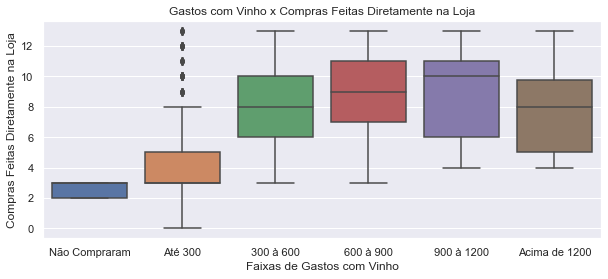

In [155]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'wines', y = 'NumStorePurchases', data = df,showfliers = True, order=["Não Compraram", "Até 300", "300 à 600",
                                                                                   "600 à 900", "900 à 1200", "Acima de 1200"]
           ).set(title = 'Gastos com Vinho x Compras Feitas Diretamente na Loja',
                xlabel = 'Faixas de Gastos com Vinho', ylabel = 'Compras Feitas Diretamente na Loja')

In [156]:
# Tabela Cruzada de Frequência
pd.crosstab(df['wines'], df['store'])

store,10 ou mais,4 a 6,7 a 9,Até 3,Não Compraram
wines,,,,,
300 à 600,156,132,152,4,0
600 à 900,98,60,87,1,0
900 à 1200,70,39,28,0,0
Acima de 1200,11,19,12,0,0
Até 300,59,463,119,702,15
Não Compraram,0,0,0,13,0


#### Aqueles que possuem gastos acumulados de até 300 reais com vinhos, realizaram em sua maioria entre 3 e 5 compras diretamente na loja, já aqueles com gastos acumulados superiores a 300, realizaram em sua maioria de 5 a 11 compras diretamente na loja, quantidade bem maior.

### Gastos com Frutas x Gastos com Carne

[Text(0.5, 1.0, 'Gastos com Frutas x Gastos com Carne'),
 Text(0.5, 0, 'Faixas de Gastos com Frutas'),
 Text(0, 0.5, 'Gastos com Carne')]

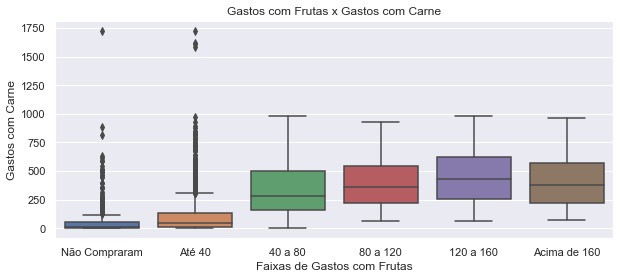

In [157]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'fruits', y = 'MntMeatProducts', data = df,showfliers = True, order=["Não Compraram", "Até 40", "40 a 80",
                                                                                   "80 a 120", "120 a 160", "Acima de 160"]
           ).set(title = 'Gastos com Frutas x Gastos com Carne',
                xlabel = 'Faixas de Gastos com Frutas', ylabel = 'Gastos com Carne')

[Text(0.5, 1.0, 'Gastos com Frutas x Gastos com Carne'),
 Text(0.5, 0, 'Gastos com Frutas'),
 Text(0, 0.5, 'Gastos com Carne')]

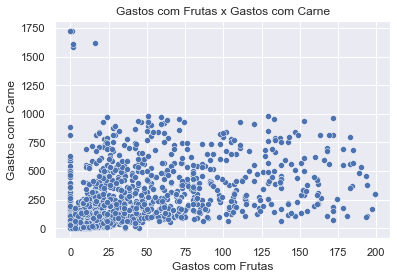

In [158]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntFruits', y = 'MntMeatProducts', data = df).set(title = 'Gastos com Frutas x Gastos com Carne',
                xlabel = 'Gastos com Frutas', ylabel = 'Gastos com Carne')

In [159]:
# Tabela Cruzada de Frequência
pd.crosstab(df['fruits'], df['meats'])

meats,300 a 600,600 a 900,900 a 1200,Acima de 1200,Até 300,Não Compraram
fruits,,,,,,
120 a 160,29,17,3,0,23,0
40 a 80,74,33,11,0,129,0
80 a 120,40,23,3,0,52,0
Acima de 160,19,8,1,0,15,0
Até 40,118,36,2,4,1200,0
Não Compraram,18,4,0,1,376,1


#### Observando pela divisão das classes dos gastos acumulados com frutas, nota-se que os clientes que possuem gastos acumulados de até 40 reais com frutas, possuem gasto acumulado médio ligeiramente maior do que aqueles que não possuem gastos acumulados com frutas, já aqueles que possuem um gasto acumulado maior que 40 reais, possuem um gasto com carne similar. Agora observando o gráfico de dispersão, conseguimos ver que aqueles que possuem gastos menores com frutas tem maior concentração em menores gastos com carne.

### Gastos com Frutas x Gastos com Peixe

[Text(0.5, 1.0, 'Gastos com Frutas x Gastos com Peixe'),
 Text(0.5, 0, 'Faixas de Gastos com Frutas'),
 Text(0, 0.5, 'Gastos com Peixe')]

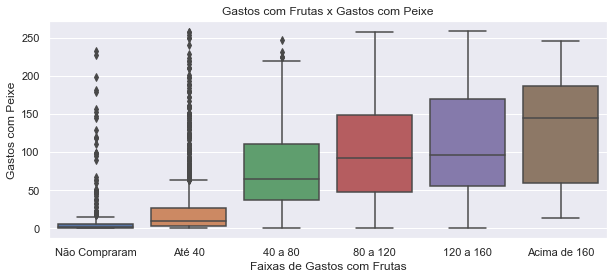

In [160]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'fruits', y = 'MntFishProducts', data = df,showfliers = True, order=["Não Compraram", "Até 40", "40 a 80",
                                                                                   "80 a 120", "120 a 160", "Acima de 160"]
           ).set(title = 'Gastos com Frutas x Gastos com Peixe',
                xlabel = 'Faixas de Gastos com Frutas', ylabel = 'Gastos com Peixe')

[Text(0.5, 1.0, 'Gastos com Frutas x Gastos com Peixe'),
 Text(0.5, 0, 'Gastos com Frutas'),
 Text(0, 0.5, 'Gastos com Peixe')]

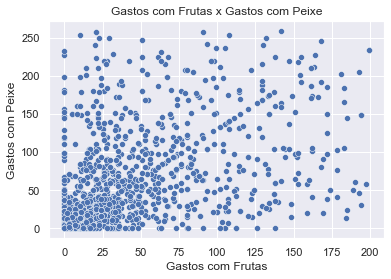

In [161]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntFruits', y = 'MntFishProducts', data = df).set(title = 'Gastos com Frutas x Gastos com Peixe',
                xlabel = 'Gastos com Frutas', ylabel = 'Gastos com Peixe')

In [162]:
# Tabela Cruzada de Frequência
pd.crosstab(df['fruits'], df['fish'])

fish,100 a 150,150 a 200,50 a 100,Acima de 200,Não Compraram,até 50
fruits,,,,,,
120 a 160,9,15,20,10,2,16
40 a 80,44,15,86,13,9,80
80 a 120,27,17,31,11,6,26
Acima de 160,9,9,6,9,0,10
Até 40,46,25,108,15,175,991
Não Compraram,7,5,11,2,192,183


#### Com o auxílio dos gráficos é possível notar uma correlação positiva moderada entre as variáveis, já que quanto maior o gasto acumulado com frutas, também é maior o gasto acumulado com peixes. Porém também percebe-se uma concentração maior naqueles com um menor gasto acumulado com frutas.

### Gastos com Frutas x Gastos com Doce

[Text(0.5, 1.0, 'Gastos com Frutas x Gastos com Doce'),
 Text(0.5, 0, 'Faixas de Gastos com Frutas'),
 Text(0, 0.5, 'Gastos com Doce')]

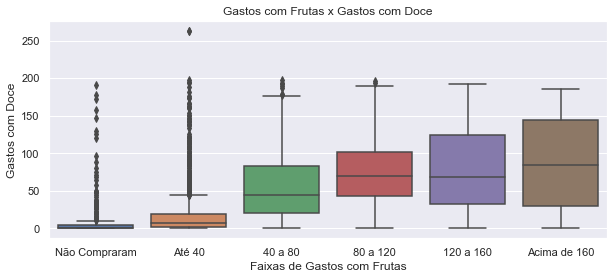

In [163]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'fruits', y = 'MntSweetProducts', data = df,showfliers = True, order=["Não Compraram", "Até 40", "40 a 80",
                                                                                   "80 a 120", "120 a 160", "Acima de 160"]
           ).set(title = 'Gastos com Frutas x Gastos com Doce',
                xlabel = 'Faixas de Gastos com Frutas', ylabel = 'Gastos com Doce')

[Text(0.5, 1.0, 'Gastos com Frutas x Gastos com Doce'),
 Text(0.5, 0, 'Gastos com Frutas'),
 Text(0, 0.5, 'Gastos com Doce')]

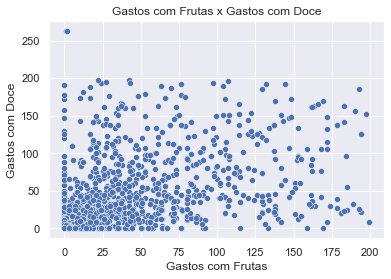

In [164]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntFruits', y = 'MntSweetProducts', data = df).set(title = 'Gastos com Frutas x Gastos com Doce',
                xlabel = 'Gastos com Frutas', ylabel = 'Gastos com Doce')

In [165]:
# Tabela Cruzada de Frequência
pd.crosstab(df['fruits'], df['sweet'])

sweet,100 a 150,150 a 200,50 a 100,Acima de 200,Não Compraram,até 50
fruits,,,,,,
120 a 160,19,7,16,0,2,28
40 a 80,29,14,69,0,18,117
80 a 120,23,9,45,0,3,38
Acima de 160,9,10,6,0,1,17
Até 40,34,16,74,2,194,1040
Não Compraram,4,4,8,0,201,183


#### Assim como na análise anterior, aqui também nota-se uma correlação postiva dos dados, só que um pouco menos acentuada. Quanto maior o gasto com frutas, também é maior o gasto com doces.

### Gastos com Peixe x Gastos com Carne

[Text(0.5, 1.0, 'Gastos com Peixe x Gastos com Carne'),
 Text(0.5, 0, 'Faixas de Gastos com Peixe'),
 Text(0, 0.5, 'Gastos com Carne')]

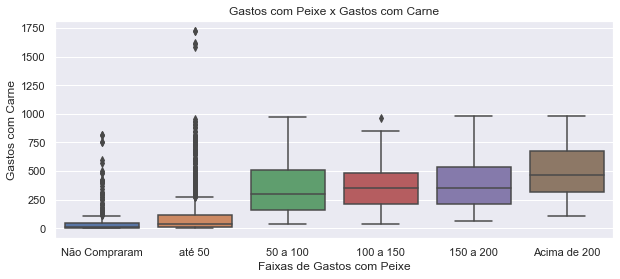

In [166]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'fish', y = 'MntMeatProducts', data = df,showfliers = True, order=["Não Compraram", "até 50", "50 a 100",
                                                                                   "100 a 150", "150 a 200", "Acima de 200"]
           ).set(title = 'Gastos com Peixe x Gastos com Carne',
                xlabel = 'Faixas de Gastos com Peixe', ylabel = 'Gastos com Carne')

[Text(0.5, 1.0, 'Gastos com Peixe x Gastos com Carne'),
 Text(0.5, 0, 'Gastos com Peixe'),
 Text(0, 0.5, 'Gastos com Carne')]

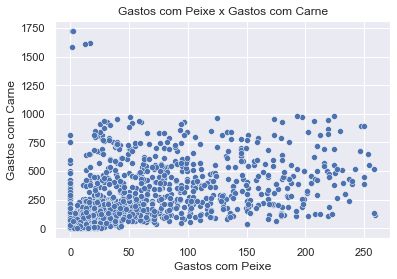

In [167]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntFishProducts', y = 'MntMeatProducts', data = df).set(title = 'Gastos com Peixe x Gastos com Carne',
                xlabel = 'Gastos com Peixe', ylabel = 'Gastos com Carne')

In [168]:
# Tabela Cruzada de Frequência
pd.crosstab(df['fish'], df['meats'])

meats,300 a 600,600 a 900,900 a 1200,Acima de 1200,Até 300,Não Compraram
fish,,,,,,
100 a 150,54,23,1,0,64,0
150 a 200,35,9,4,0,38,0
50 a 100,91,31,8,0,132,0
Acima de 200,30,15,3,0,12,0
Não Compraram,15,5,0,0,364,0
até 50,73,38,4,5,1185,1


#### Ao observar os gráfico e a tabela, é poossível notar que os gastos acumulados com carne crescem ligeiramente, quanto maior é o gasto com peixes, mas quando observamos pela separação de faixas de gastos, tem-se que os gastos ficam maiores quando os gastos acumulados com peixe ficam maiores que 50, isso se deve ao maior acúmulo de clientes na faixa de gastos menor que 50, o que puxa a média desse grupo para baixo.

### Gastos com Peixe x Gastos com Doces

[Text(0.5, 1.0, 'Gastos com Peixe x Gastos com Doces'),
 Text(0.5, 0, 'Faixas de Gastos com Peixe'),
 Text(0, 0.5, 'Gastos com Doces')]

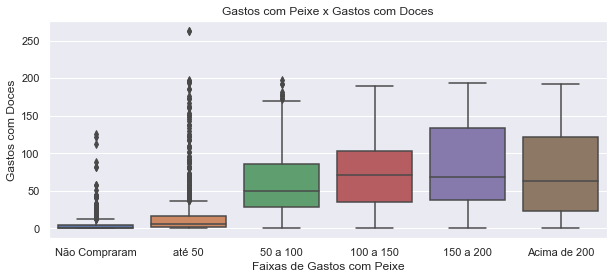

In [169]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'fish', y = 'MntSweetProducts', data = df,showfliers = True, order=["Não Compraram", "até 50", "50 a 100",
                                                                                   "100 a 150", "150 a 200", "Acima de 200"]
           ).set(title = 'Gastos com Peixe x Gastos com Doces',
                xlabel = 'Faixas de Gastos com Peixe', ylabel = 'Gastos com Doces')

[Text(0.5, 1.0, 'Gastos com Peixe x Gastos com Doces'),
 Text(0.5, 0, 'Gastos com Peixe'),
 Text(0, 0.5, 'Gastos com Doces')]

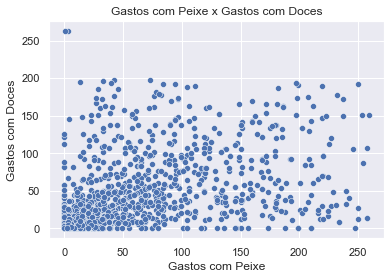

In [170]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntFishProducts', y = 'MntSweetProducts', data = df).set(title = 'Gastos com Peixe x Gastos com Doces',
                xlabel = 'Gastos com Peixe', ylabel = 'Gastos com Doces')

In [171]:
# Tabela Cruzada de Frequência
pd.crosstab(df['fish'], df['sweet'])

sweet,100 a 150,150 a 200,50 a 100,Acima de 200,Não Compraram,até 50
fish,,,,,,
100 a 150,32,8,44,0,11,47
150 a 200,17,13,24,0,5,27
50 a 100,34,15,81,0,7,125
Acima de 200,11,8,13,0,3,25
Não Compraram,3,0,6,0,205,170
até 50,21,16,50,2,188,1029


#### Aqui é fácil de perceber uma correlação positiva um pouco mais forte, onde quanto maior o gasto com peixe, também é maior o gasto com doces, olhando a separação por faixas nota-se que isso acontece até os gastos acumulados com peixe de 100 a 150 reais, depois disso temos um comportamento similar entre as faixas.

### Gastos com Peixe x Compras Usando o Catálogo

[Text(0.5, 1.0, 'Gastos com Peixe x Compras Usando o Catálogo'),
 Text(0.5, 0, 'Faixas de Gastos com Peixe'),
 Text(0, 0.5, 'Compras Usando o Catálogo')]

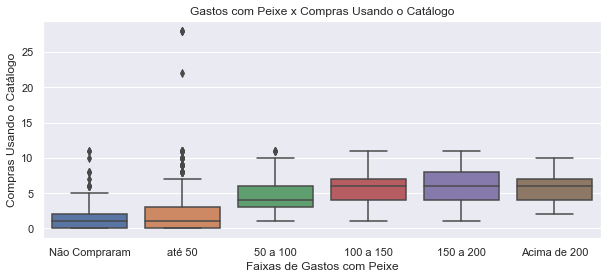

In [172]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'fish', y = 'NumCatalogPurchases', data = df,showfliers = True, order=["Não Compraram", "até 50", "50 a 100",
                                                                                   "100 a 150", "150 a 200", "Acima de 200"]
           ).set(title = 'Gastos com Peixe x Compras Usando o Catálogo',
                xlabel = 'Faixas de Gastos com Peixe', ylabel = 'Compras Usando o Catálogo')

[Text(0.5, 1.0, 'Gastos com Peixe x Compras Usando o Catálogo'),
 Text(0.5, 0, 'Gastos com Peixe'),
 Text(0, 0.5, 'Compras Usando o Catálogo')]

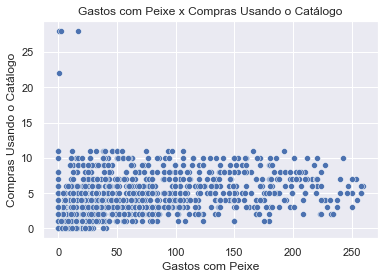

In [173]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntFishProducts', y = 'NumCatalogPurchases', data = df).set(title = 'Gastos com Peixe x Compras Usando o Catálogo',
                xlabel = 'Gastos com Peixe', ylabel = 'Compras Usando o Catálogo')

In [174]:
# Tabela Cruzada de Frequência
pd.crosstab(df['fish'], df['catalog'])

catalog,6 a 10,Acima de 11,Até 5,Não Compraram
fish,,,,
100 a 150,71,1,70,0
150 a 200,44,2,40,0
50 a 100,84,4,174,0
Acima de 200,34,0,26,0
Não Compraram,12,2,191,179
até 50,107,14,778,407


#### Aqui é possível notar uma correlação moderada para fraca, pois apeser de ser possível notar um crescimento nas compras utilizando o catálogo mínimas, quanto maior é o gasto acumulado com peixe, temos um comportamento bem similiar entre os grupos de faixas de gastos acumulados.

### Gastos com Doces x Gastos com Carne

[Text(0.5, 1.0, 'Gastos com Doces x Gastos com Carne'),
 Text(0.5, 0, 'Faixas de Gastos com Doces'),
 Text(0, 0.5, 'Gastos com Carne')]

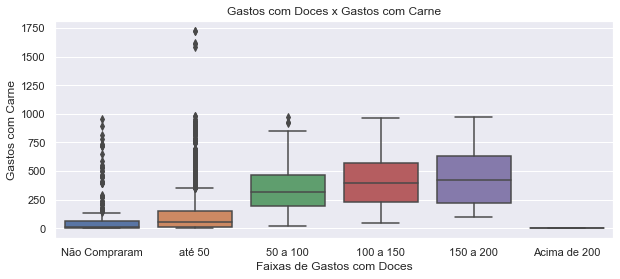

In [175]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'sweet', y = 'MntMeatProducts', data = df,showfliers = True, order=["Não Compraram", "até 50", "50 a 100",
                                                                                   "100 a 150", "150 a 200", "Acima de 200"]
           ).set(title = 'Gastos com Doces x Gastos com Carne',
                xlabel = 'Faixas de Gastos com Doces', ylabel = 'Gastos com Carne')

[Text(0.5, 1.0, 'Gastos com Doces x Gastos com Carne'),
 Text(0.5, 0, 'Gastos com Doces'),
 Text(0, 0.5, 'Gastos com Carne')]

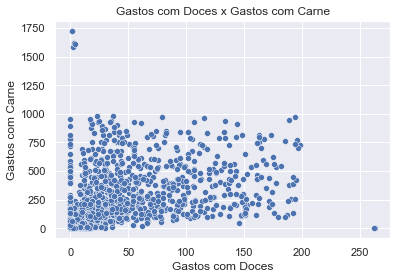

In [176]:
# Construindo Gráfico de Dispersão
sns.scatterplot(x = 'MntSweetProducts', y = 'MntMeatProducts', data = df).set(title = 'Gastos com Doces x Gastos com Carne',
                xlabel = 'Gastos com Doces', ylabel = 'Gastos com Carne')

In [177]:
# Tabela Cruzada de Frequência
pd.crosstab(df['sweet'], df['meats'])

meats,300 a 600,600 a 900,900 a 1200,Acima de 1200,Até 300,Não Compraram
sweet,,,,,,
100 a 150,45,23,5,0,45,0
150 a 200,20,14,2,0,24,0
50 a 100,82,29,3,0,104,0
Acima de 200,0,0,0,0,2,0
Não Compraram,17,8,1,0,393,0
até 50,134,47,9,5,1227,1


#### Nota-se uma correlação moderada fraca aqui, visto que os dados possuem comportamento similares quanto aos gastos acumulados com carne, com uma concentração um pouco maior nos clientes que possuem gasto acumulado com doces menor que 50 reais nos pontos de menor gasto com carne, mas aumentando a partir desse grupo.

### Compras pelo Site x Compras Feitas Diretamente na Loja

[Text(0.5, 1.0, 'Compras pelo Site x Compras Feitas Diretamente na Loja'),
 Text(0.5, 0, 'Faixas de Compras pelo Site'),
 Text(0, 0.5, 'Compras Feitas Diretamente na Loja')]

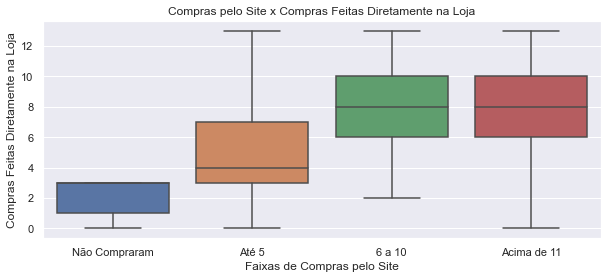

In [178]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'web', y = 'NumStorePurchases', data = df,showfliers = True, order=["Não Compraram", "Até 5", "6 a 10",
                                                                                   "Acima de 11"]
           ).set(title = 'Compras pelo Site x Compras Feitas Diretamente na Loja',
                xlabel = 'Faixas de Compras pelo Site', ylabel = 'Compras Feitas Diretamente na Loja')

In [179]:
# Tabela Cruzada de Frequência
pd.crosstab(df['web'], df['store'])

store,10 ou mais,4 a 6,7 a 9,Até 3,Não Compraram
web,,,,,
6 a 10,188,205,178,9,0
Acima de 11,15,12,17,1,3
Até 5,191,496,203,671,2
Não Compraram,0,0,0,39,10


#### Com o auxílio do gráfico e da tabela, nota-se uma correlação positiva, onde quanto maior o número de compras feitas pelo site, também é maior o número de compras realizadas diretamente na loja.

### Compras usando o Catálogo x Gastos com Carne

[Text(0.5, 1.0, 'Compras usando o Catálogo x Gastos com Carne'),
 Text(0.5, 0, 'Faixas de Compras usando o Catálogo'),
 Text(0, 0.5, 'Gastos com Carne')]

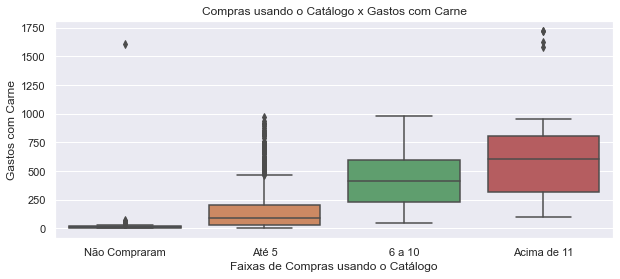

In [180]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'catalog', y = 'MntMeatProducts', data = df,showfliers = True, order=["Não Compraram", "Até 5", "6 a 10",
                                                                                   "Acima de 11"]
           ).set(title = 'Compras usando o Catálogo x Gastos com Carne',
                xlabel = 'Faixas de Compras usando o Catálogo', ylabel = 'Gastos com Carne')

In [181]:
# Tabela Cruzada de Frequência
pd.crosstab(df['catalog'], df['meats'])

meats,300 a 600,600 a 900,900 a 1200,Acima de 1200,Até 300,Não Compraram
catalog,,,,,,
6 a 10,143,73,14,0,122,0
Acima de 11,7,7,1,4,4,0
Até 5,148,41,5,0,1085,0
Não Compraram,0,0,0,1,584,1


#### Quanto maior a quantidade de compras realizadas utilizando o catálogo, maior a quantidade de gastos acumulados com carne, aqui com o auxílio do gráfico e da tabela é possível notar uma correlação moderada forte.

### Compras usando o Catálogo x Compras Feitas Diretamente da Loja

[Text(0.5, 1.0, 'Compras usando o Catálogo x Compras Feitas Diretamente da Loja'),
 Text(0.5, 0, 'Faixas de Compras usando o Catálogo'),
 Text(0, 0.5, 'Compras Feitas Diretamente da Loja')]

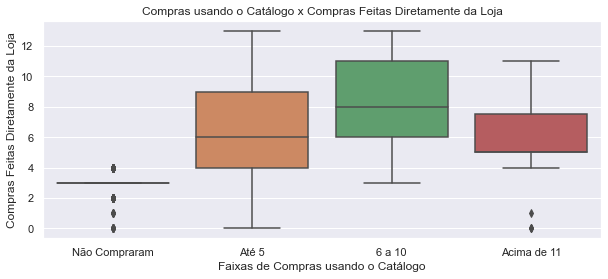

In [182]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'catalog', y = 'NumStorePurchases', data = df,showfliers = True, order=["Não Compraram", "Até 5", "6 a 10",
                                                                                   "Acima de 11"]
           ).set(title = 'Compras usando o Catálogo x Compras Feitas Diretamente da Loja',
                xlabel = 'Faixas de Compras usando o Catálogo', ylabel = 'Compras Feitas Diretamente da Loja')

In [183]:
# Tabela Cruzada de Frequência
pd.crosstab(df['catalog'], df['store'])

store,10 ou mais,4 a 6,7 a 9,Até 3,Não Compraram
catalog,,,,,
6 a 10,133,117,100,2,0
Acima de 11,4,11,4,1,3
Até 5,257,474,294,253,1
Não Compraram,0,111,0,464,11


#### O cliente que possui até 10 compras utilizando o catálogo, quanto mais compras possui dessa forma, mais compras ele realiza diretamente da loja também, tendo uma leve queda nesse número de compras diretamente da loja quando se trata de cliente que possuem mais de 11 compras utilizando o catálogo, isso se dá muito devido a quantidade pequena de clientes nesse grupo e tendo dois que realizaram em média 0,5 compras diretamente na loja.

### Compras usando o Catálogo x Número de Visitas no Site

[Text(0.5, 1.0, 'Compras usando o Catálogo x Número de Visitas no Site'),
 Text(0.5, 0, 'Faixas de Compras usando o Catálogo'),
 Text(0, 0.5, 'Número de Visitas no Site')]

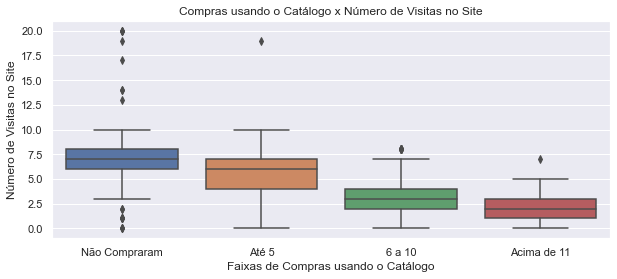

In [184]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'catalog', y = 'NumWebVisitsMonth', data = df,showfliers = True, order=["Não Compraram", "Até 5", "6 a 10",
                                                                                   "Acima de 11"]
           ).set(title = 'Compras usando o Catálogo x Número de Visitas no Site',
                xlabel = 'Faixas de Compras usando o Catálogo', ylabel = 'Número de Visitas no Site')

In [185]:
# Tabela Cruzada de Frequência
pd.crosstab(df['catalog'], df['visit'])

visit,3 a 6,6 a 9,Até 3,Mais de 9,Não Visitaram
catalog,,,,,
6 a 10,95,22,232,0,3
Acima de 11,4,1,16,0,2
Até 5,532,450,292,2,3
Não Compraram,208,345,20,10,3


#### Aqui é possível ver uma correlação negativo, onde quanto maior o número de compras realizadas utilizando o catálogo, menos é a quantidade de visitas ao site da empresa, sendo aqueles que nunca fizeram compras utilizando o catálogo, os que mais visitam o site em média.

### Número de Visitas no Site x Gastos com Carne

[Text(0.5, 1.0, 'Número de Visitas no Site x Gastos com Carne'),
 Text(0.5, 0, 'Faixas de Número de Visitas no Siteo'),
 Text(0, 0.5, 'Gastos com Carne')]

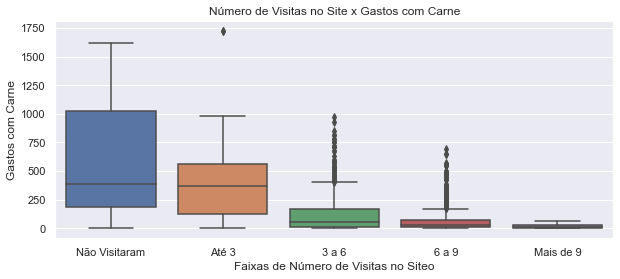

In [186]:
# Construção do Box-Plot removendo os Outliers para melhor visualização
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(x = 'visit', y = 'MntMeatProducts', data = df,showfliers = True, order=["Não Visitaram", "Até 3", "3 a 6",
                                                                                   "6 a 9","Mais de 9"]
           ).set(title = 'Número de Visitas no Site x Gastos com Carne',
                xlabel = 'Faixas de Número de Visitas no Siteo', ylabel = 'Gastos com Carne')

In [187]:
# Tabela Cruzada de Frequência
pd.crosstab(df['visit'], df['meats'])

meats,300 a 600,600 a 900,900 a 1200,Acima de 1200,Até 300,Não Compraram
visit,,,,,,
3 a 6,72,14,2,0,750,1
6 a 9,29,3,0,0,786,0
Até 3,192,104,18,2,244,0
Mais de 9,0,0,0,0,12,0
Não Visitaram,5,0,0,3,3,0


#### Os gastos acumulados com carne e o número de visitas ao site também possui uma correlação negativa, sendo assim é possível perceber que o cliente que mais gasta com carne é o que menos visita o site da empresa.

# Preparação das variáveis para o Modelo

In [188]:
# Visualizando base dados com variáveis provisórias criadas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 47 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   float64       
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2240 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

### Transformando Variáveis Categóricas em Dummy

In [189]:
# Transformando a variável Education em Variável Dummy
# Criando variável com cada tipo de observação virando um número
le = preprocessing.LabelEncoder()
le.fit(df['Education'].astype(str))
df['Education_Dummy'] = le.transform(df['Education'].astype(str))

#Transformando cada tipo de observação em uma variável
dummies_Education = pd.get_dummies(df['Education_Dummy']).rename(columns=lambda x: 'Education_' + str(x))
df = pd.concat([df, dummies_Education], axis=1)

# 0 = 2n Cycle; 1 = Basic; 2 = Graduation; 3 = Master; 4 = PhD

In [190]:
# Transformando a variável Marital_Status em Variável Dummy
# Criando variável com cada tipo de observação virando um número
le = preprocessing.LabelEncoder()
le.fit(df['Marital_Status'].astype(str))
df['Marital_Status_Dummy'] = le.transform(df['Marital_Status'].astype(str))

# As observações Absurd, Alone, Widow e YOLO, possuem poucas quantidades,
# dessa forma vamos agrupa-las em 'Outros' para melhor entendimento do modelo
df.loc[(((df['Marital_Status_Dummy']==1)|(df['Marital_Status_Dummy']==6)|(df['Marital_Status_Dummy']==7))),
       'Marital_Status_Dummy'] = 0

#Transformando cada tipo de observação em uma variável
dummies_Marital_Status = pd.get_dummies(df['Marital_Status_Dummy']).rename(columns=lambda x: 'Marital_Status_' + str(x))
df = pd.concat([df, dummies_Marital_Status], axis=1)

# 0 = Outros; 2 = Divorced; 3 = Married; 4 = Single; 5 = Together

In [191]:
# Transformando a variável Sem_cust (Semestre de inscrição na empresa) em Variável Dummy
# Criando variável com cada tipo de observação virando um número
le = preprocessing.LabelEncoder()
le.fit(df['sem_cust'].astype(str))
df['sem_cust_Dummy'] = le.transform(df['sem_cust'].astype(str))


#Transformando cada tipo de observação em uma variável
dummies_sem_cust = pd.get_dummies(df['sem_cust_Dummy']).rename(columns=lambda x: 'sem_cust_' + str(x))
df = pd.concat([df, dummies_sem_cust], axis=1)

# 0 = 2012/02; 1 = 2013/01; 2 = 2013/02; 4 = 2014/01

### Retirando as variáveis que não serão utilizadas no Modelo

In [192]:
df.drop(df.columns[[0,2,3,7,26,27,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,53,59]], axis=1, inplace=True)

# Modelagem

In [193]:
#Consultando o nome das colunas
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Marital_Status_0',
       'Marital_Status_2', 'Marital_Status_3', 'Marital_Status_4',
       'Marital_Status_5', 'sem_cust_0', 'sem_cust_1', 'sem_cust_2',
       'sem_cust_3'],
      dtype='object')

### Separação das variáveis explicativas e da variável resposta

In [194]:
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Marital_Status_0',
       'Marital_Status_2', 'Marital_Status_3', 'Marital_Status_4',
       'Marital_Status_5', 'sem_cust_0', 'sem_cust_1', 'sem_cust_2',
       'sem_cust_3']]

Y = df['Response']

### Separação das variáveis explicativas e resposta , em base de treino e teste, com divisão 70-30

In [195]:
#Utilizando o train_test_split para dividir as variáveis
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, train_size=0.7, test_size=0.3, random_state=42, shuffle=True)

In [196]:
# Print da quantidade de observações em cada base
print("Quantidade de observações da base teste: " + str(len(X_train)))
print("Quantidade de observações da base treino: " + str(len(X_test)))
print("Quantidade de observações Respota teste: " + str(len(y_train)))
print("Quantidade de observações Resposta treino: " + str(len(y_test)))

Quantidade de observações da base teste: 1568
Quantidade de observações da base treino: 672
Quantidade de observações Respota teste: 1568
Quantidade de observações Resposta treino: 672


### Criando Tabela de Métricas do Modelo

In [197]:
metricas = pd.DataFrame()
metricas['Modelo'] = []
metricas['Acuracia'] = []
metricas['CV'] = []
metricas['ROC'] = []
metricas['Precision'] = []
metricas['Recall'] = []
metricas['KS'] = []

metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS


## Construção do Modelo de Random Forest

In [198]:
# Definindo parâmetros do modelo
rfc = RFC(n_jobs=-1, n_estimators = 200, random_state=42)

# Realizando o fit dos modelos
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

### Seleção de Variáveis

In [199]:
#Seleção de Variáveis Utilizando o Random Forest
rfc.feature_importances_

array([0.04634069, 0.0659215 , 0.00503978, 0.01210494, 0.09109991,
       0.06733734, 0.04344431, 0.06486984, 0.0422612 , 0.04041361,
       0.05989409, 0.02790568, 0.03371564, 0.03743155, 0.04062536,
       0.03940726, 0.04197896, 0.01218532, 0.05726376, 0.04770109,
       0.0073453 , 0.00029384, 0.00335382, 0.0019699 , 0.00826418,
       0.00594531, 0.01249465, 0.0062219 , 0.00708354, 0.00967509,
       0.01107501, 0.00964709, 0.02129841, 0.00556139, 0.005688  ,
       0.00714075])

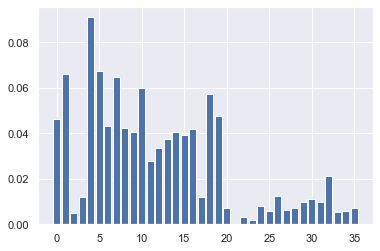

In [200]:
#Gráfico das importância de cada variável para o modelo
plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.show()

#### Algumas variáveis não são significativamente importantes como podemos ver no gráfico, porém como o modelo continua desempenhando bem, podemo mantê-las

## Retorno a construção do modelo

In [201]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = rfc.predict(X_test)

acuracia = rfc.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, rfc.predict(X_test)))

O modelo obteve 0.8765 de acurácia.
[[563  14]
 [ 69  26]]


#### Acurácia boa, porém é uma métrica que necessita ser complementada pelo menos pela precisão e pelo recall.

### Validação Cruzada

In [202]:
# Validação cruzada, testando em 5 modelos
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.

SEED = 42
np.random.seed(SEED)
model = rfc
results = cross_val_score(model, X_train, 
                          y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)
cv = results.mean()

Acurácia média: 88.39%
Intervalo de acurácia: [85.81% ~ 90.98%]


### Curva ROC

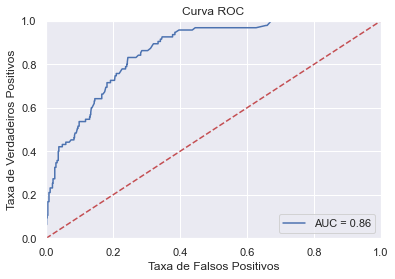

In [203]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o gráfico

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [204]:
#Teste ROC
y_predict = rfc.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
roc_teste

0.6247103894919274

### Acurácia Cutoff

In [205]:
# Construindo a Função para calcular o cutoff dos valores preditos no modelo

def Find_Optimal_Cutoff(target, predicted):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value
        
    """
    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.iloc[(roc.tf-0).abs().argsort()[:1]]
    
    

    return roc_t['threshold'] 

In [206]:
# Calculando a Acurácia Cutoff
y_logistic_train = rfc.predict(X_test)
prob_logistic_train = rfc.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[467   0]
 [165  40]]
0.7738095238095238


#### O Cutoff define o ponto de corte de a partir de onde o modelo entender que a obseração vai converter

# Matriz de Confusão

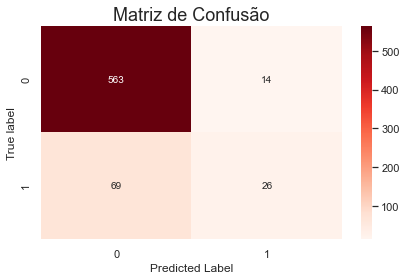

In [207]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = RFC()
y_pred = cross_val_predict(rfc, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_logistic_train), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

#### A Matriz de confusão retorna os resultados do modelo em formato de matriz, onde a legenda lateral mostra o valor verdadeiro, e a legenda de baixo mostra o valor predito. Os valores dessa matriz se diferenciam dos resultado real do modelo, pois está sendo utilizada uma validação cruzada também para, dividindo a base em 5 diferentes.

### PRECISION

In [208]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.7058823529411765

#### A precisão cálcula o quão bem o modelo está diminuindo a quantidade de falsos negativos, ou seja, o quão bem ele não está errando ao prever se um resultado é negativo, ou não converte.

### RECALL

In [209]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivo
recall = recall_score(y_test, y_pred)
recall

0.12631578947368421

#### O recall cálcula o quão bem o modelo está diminuindo a quantidade de falsos positivos, ou seja, aqueles que o modelo prevê como positivos, ou que converteram, porém não o são.

### KS

In [210]:
# Construindo a função para calcular o KS
def ks1(modelo, X, Y):
    #predicao das classes positivas (1) da variável resposta
    preds_pos = modelo.predict_proba(X)[:,1] 
    #separa as probabilidades dado que o evento realmente ocorreu, e dado que o evento não ocorreu
    pos_preds_pos = preds_pos[Y == 1]
    nul_preds_pos = preds_pos[Y == 0]
    #calcula o ks, criando as distribuições acumuladas, e encontrando o ponto maior diferenciação entre elas
    ks = ks_2samp(pos_preds_pos, nul_preds_pos)
    return(ks.statistic)

In [211]:
# Retornando o valor do KS tanto para treino quanto para teste
ks_train = ks1(rfc, X_train, y_train)
ks_test = ks1(rfc, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.9924755455229496
Ks Amostra de Teste:  0.5872115296907781


#### O KS assim como a curva roc, ele também testa o quanto o modelo está sabendo separar a variável resposta entre 0 e 1, assim quanto maior for a métrica, melhor a predição do modelo

In [212]:
#Alimentando a tabela de métricas
d = {'Modelo': ['Random Forest'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.62471,0.705882,0.126316,0.587212,0.77381


## Construção do Modelo de Regressão Logística

In [213]:
# Definindo os parâmetros do modelo de Regressão Logística
rl = reglog( solver='liblinear')

# Realizando o fit dos modelos com as obervações de treino
rl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [214]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = rl.predict(X_test)

acuracia = rl.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, rl.predict(X_test)))

O modelo obteve 0.8661 de acurácia.
[[564  13]
 [ 77  18]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [215]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = rl
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 85.20%
Intervalo de acurácia: [83.28% ~ 87.13%]


### Curva ROC

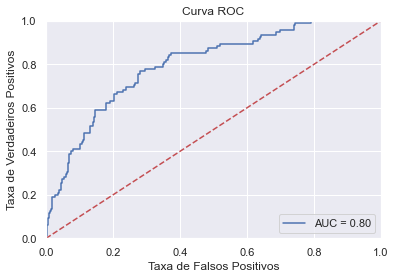

In [216]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = rl.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [217]:
y_predict = rl.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.5835


### Matriz de Confusão

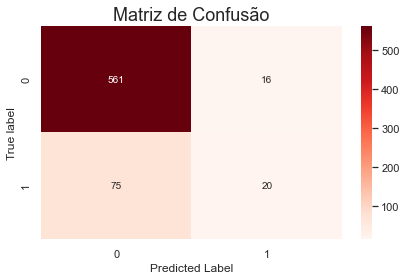

In [218]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = rl
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

#### A Matriz de confusão retorna os resultados do modelo em formato de matriz, onde a legenda lateral mostra o valor verdadeiro, e a legenda de baixo mostra o valor predito. Os valores dessa matriz se diferenciam dos resultado real do modelo, pois está sendo utilizada uma validação cruzada também para, dividindo a base em 5 diferentes.

### PRECISION

In [219]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.5555555555555556

#### A precisão cálcula o quão bem o modelo está diminuindo a quantidade de falsos negativos, ou seja, o quão bem ele não está errando ao prever se um resultado é negativo, ou não converte.

### RECALL

In [220]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.21052631578947367

#### O recall cálcula o quão bem o modelo está diminuindo a quantidade de falsos positivos, ou seja, aqueles que o modelo prevê como positivos, ou que converteram, porém não o são.

### KS

In [221]:
ks_train = ks1(rl, X_train, y_train)
ks_test = ks1(rl, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.5267086650862164
Ks Amostra de Teste:  0.48765848764024444


#### O KS assim como a curva roc, ele também testa o quanto o modelo está sabendo separar a variável resposta entre 0 e 1, assim quanto maior for a métrica, melhor a predição do modelo

### CUTOFF

In [222]:
# Calculando a Acurácia Cutoff
y_logistic_train = rl.predict(X_test)
prob_logistic_train = rl.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[446   0]
 [195  31]]
0.7247023809523809


#### O Cutoff define o ponto de corte de a partir de onde o modelo entender que a obseração vai converter

In [223]:
#Alimentando a tabela de métricas
d = {'Modelo': ['Regressão Logística'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702


## Construção do Modelo Gradient Boosting

In [224]:
# Definindo os parâmetros do modelo de Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0,min_samples_split=2,max_depth=5)

# Realizando o fit dos modelos com as obervações de treino
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, random_state=0)

### Validação cruzada, utilizando o kfold para aleatorizar as observações'

In [225]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = gbc.predict(X_test)

acuracia = gbc.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, gbc.predict(X_test)))

O modelo obteve 0.8780 de acurácia.
[[555  22]
 [ 60  35]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [226]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = gbc
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 88.20%
Intervalo de acurácia: [85.86% ~ 90.54%]


### Curva ROC

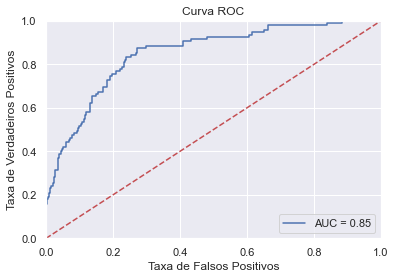

In [227]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [228]:
y_predict = rl.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.5835


### Matriz de Confusão

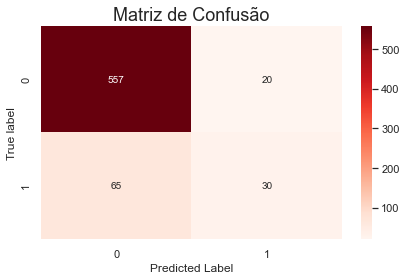

In [229]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = gbc
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

#### A Matriz de confusão retorna os resultados do modelo em formato de matriz, onde a legenda lateral mostra o valor verdadeiro, e a legenda de baixo mostra o valor predito. Os valores dessa matriz se diferenciam dos resultado real do modelo, pois está sendo utilizada uma validação cruzada também para, dividindo a base em 5 diferentes.

### PRECISION

In [230]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.6

#### A precisão cálcula o quão bem o modelo está diminuindo a quantidade de falsos negativos, ou seja, o quão bem ele não está errando ao prever se um resultado é negativo, ou não converte.

### RECALL

In [231]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.3157894736842105

#### O recall cálcula o quão bem o modelo está diminuindo a quantidade de falsos positivos, ou seja, aqueles que o modelo prevê como positivos, ou que converteram, porém não o são.

### KS

In [232]:
ks_train = ks1(gbc, X_train, y_train)
ks_test = ks1(gbc, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.9924755455229496
Ks Amostra de Teste:  0.601587156800146


#### O KS assim como a curva roc, ele também testa o quanto o modelo está sabendo separar a variável resposta entre 0 e 1, assim quanto maior for a métrica, melhor a predição do modelo

### CUTOFF

In [233]:
# Calculando a Acurácia Cutoff
y_logistic_train = gbc.predict(X_test)
prob_logistic_train = gbc.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[471   0]
 [144  57]]
0.7797619047619048


#### O Cutoff define o ponto de corte de a partir de onde o modelo entender que a obseração vai converter

In [234]:
#Alimentando a tabela de métricas
d = {'Modelo': ['Gradient Boosting'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762


## Construindo Modelo de XGBoost

In [235]:
# Definindo os parâmetros do modelo de XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.09, random_state=42,eval_metric='logloss', use_label_encoder=False)

# Realizando o fit dos modelos com as obervações de treino
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.09, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [236]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = xgb.predict(X_test)

acuracia = xgb.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, xgb.predict(X_test)))

O modelo obteve 0.8765 de acurácia.
[[551  26]
 [ 57  38]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [237]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = xgb
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 88.33%
Intervalo de acurácia: [85.63% ~ 91.03%]


### Curva ROC

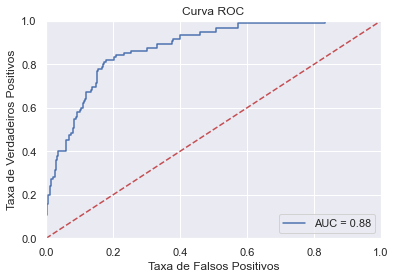

In [238]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [239]:
y_predict = xgb.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.6775


### Matriz de Confusão

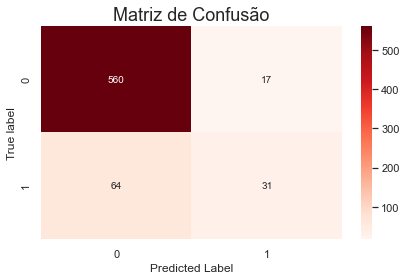

In [240]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = xgb
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

#### A Matriz de confusão retorna os resultados do modelo em formato de matriz, onde a legenda lateral mostra o valor verdadeiro, e a legenda de baixo mostra o valor predito. Os valores dessa matriz se diferenciam dos resultado real do modelo, pois está sendo utilizada uma validação cruzada também para, dividindo a base em 5 diferentes.

### PRECISION

In [241]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.6458333333333334

#### A precisão cálcula o quão bem o modelo está diminuindo a quantidade de falsos negativos, ou seja, o quão bem ele não está errando ao prever se um resultado é negativo, ou não converte.

### RECALL

In [242]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.3263157894736842

#### O recall cálcula o quão bem o modelo está diminuindo a quantidade de falsos positivos, ou seja, aqueles que o modelo prevê como positivos, ou que converteram, porém não o são.

### KS

In [243]:
ks_train = ks1(xgb, X_train, y_train)
ks_test = ks1(xgb, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.9924755455229496
Ks Amostra de Teste:  0.6408099972635227


#### O KS assim como a curva roc, ele também testa o quanto o modelo está sabendo separar a variável resposta entre 0 e 1, assim quanto maior for a métrica, melhor a predição do modelo

### CUTOFF

In [244]:
# Calculando a Acurácia Cutoff
y_logistic_train = xgb.predict(X_test)
prob_logistic_train = xgb.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[490   0]
 [118  64]]
0.8199404761904762


#### O Cutoff define o ponto de corte de a partir de onde o modelo entender que a obseração vai converter

In [245]:
#Alimentando a tabela de métricas
d = {'Modelo': ['XGBoost'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940


## Construção do Modelo de AdaBoost

In [246]:
# Definindo os parâmetros do modelo de XGBoost
abc = AdaBoostClassifier(n_estimators=200, learning_rate=1.0, random_state=42)

# Realizando o fit dos modelos com as obervações de treino
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [247]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = abc.predict(X_test)

acuracia = abc.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, abc.predict(X_test)))

O modelo obteve 0.8824 de acurácia.
[[553  24]
 [ 55  40]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [248]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = abc
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 86.99%
Intervalo de acurácia: [83.86% ~ 90.12%]


### Curva ROC

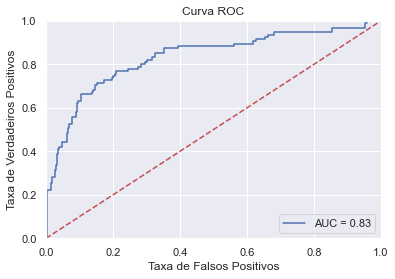

In [249]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = abc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [250]:
y_predict = abc.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.6897


### Matriz de Confusão

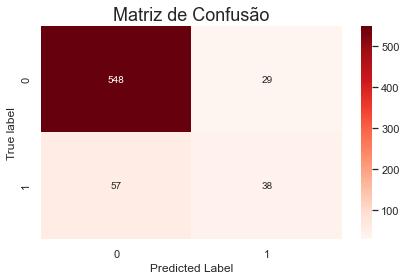

In [251]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = abc
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

#### A Matriz de confusão retorna os resultados do modelo em formato de matriz, onde a legenda lateral mostra o valor verdadeiro, e a legenda de baixo mostra o valor predito. Os valores dessa matriz se diferenciam dos resultado real do modelo, pois está sendo utilizada uma validação cruzada também para, dividindo a base em 5 diferentes.

### PRECISION

In [252]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.5671641791044776

#### A precisão cálcula o quão bem o modelo está diminuindo a quantidade de falsos negativos, ou seja, o quão bem ele não está errando ao prever se um resultado é negativo, ou não converte.

### RECALL

In [253]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.4

#### O recall cálcula o quão bem o modelo está diminuindo a quantidade de falsos positivos, ou seja, aqueles que o modelo prevê como positivos, ou que converteram, porém não o são.

### KS

In [254]:
ks_train = ks1(abc, X_train, y_train)
ks_test = ks1(abc, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.8725628166016541
Ks Amostra de Teste:  0.5632764754173127


#### O KS assim como a curva roc, ele também testa o quanto o modelo está sabendo separar a variável resposta entre 0 e 1, assim quanto maior for a métrica, melhor a predição do modelo

### CUTOFF

In [255]:
# Calculando a Acurácia Cutoff
y_logistic_train = abc.predict(X_test)
prob_logistic_train = abc.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[466   0]
 [142  64]]
0.7693452380952381


#### O Cutoff define o ponto de corte de a partir de onde o modelo entender que a obseração vai converter

In [256]:
#Alimentando a tabela de métricas
d = {'Modelo': ['AdaBoost'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940
0,AdaBoost,0.882440,0.869917,0.689729,0.567164,0.400000,0.563276,0.769345


#### Olhando a tabela de métricas do modelo, pode-se assumir que o melhor modelo entre os testados foi o XGBoost.
#### Apesar de ter algumas métricas com resultados bem próximos ao de outros modelos, temos que ele possui o melhor KS que determina o quão bem o modelo está separando a resposta 0 da resposta 1. 

#### Contudo este ainda necessita de melhorias, visto que a quantidade de erros do tipo I ou seja, os falso negativos, ainda está alta. Podemos aperfeiçor isso com mais observações, e com outra variáveis que ajudem a calibrar melhor o modelo.

### Criando a base com os resultado do modelo escolhido (XGBoost)

In [257]:
# Criando vetor de resultados do modelo
y_pred = xgb.predict(X_test)

#Transformando em DataFrame
base_pred = pd.DataFrame(y_pred)

#Alterando o nome da coluna
base_pred.columns = ['Converteu']


# Criando vetor com a probabilidade de conversão do modelo
y_prob = xgb.predict_proba(X_test)

#Transformando em DataFrame
base_prob = pd.DataFrame(y_prob)

#Alterando os nomes das colunas
base_prob.columns = ['Prob_0', 'Prob_1']

## Criando base com as bases testes, a predição e a probabilidade de conversão

In [258]:
#Criando base nova a partir do X_test
base_xgb = X_test.copy()

#Criando variável y_real a partir da base de teste resposta
base_xgb['y_real'] = y_test

#Criando variável do preditos pelo modelo y_pred
base_xgb['y_pred'] = y_pred

In [259]:
#Criando variáveis das probabilidade do target ser 0 ou ser 1
prob0 = []
prob1 = []
for j in range(0,2):
    for i in range(0,len(y_prob)):
        if j==0:
            prob0.append(float(y_prob[[i],j]))
        else:
            prob1.append(float(y_prob[[i],j]))
            
base_xgb['Prob_0'] = prob0
base_xgb['Prob_1'] = prob1
base_xgb.reset_index(inplace=True)

base_xgb.head()

,index,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,Marital_Status_4,Marital_Status_5,sem_cust_0,sem_cust_1,sem_cust_2,sem_cust_3,y_real,y_pred,Prob_0,Prob_1
0,324,1953.0,40464.0,0,1,78,424,17,118,7,...,1,0,0,1,0,0,0,0,0.981868,0.018132
1,96,1960.0,47916.0,0,1,72,505,0,26,0,...,0,0,1,0,0,0,0,0,0.704720,0.295280
2,2104,1972.0,14188.0,0,0,40,2,7,11,16,...,0,0,0,1,0,0,0,0,0.998278,0.001722
3,1259,1969.0,76653.0,0,0,91,736,63,946,219,...,0,1,0,0,1,0,0,0,0.962207,0.037793
4,1061,1958.0,65196.0,0,2,34,743,19,181,12,...,0,1,0,0,1,0,0,0,0.981233,0.018767


### Entendendo o Perfil de cada Grupo de Probabilidade

In [260]:
# Criação da variável gasto com produtos
base_xgb['gasto_prod']= base_xgb['MntWines']+ base_xgb['MntFruits']+ base_xgb['MntMeatProducts']+base_xgb['MntFishProducts']+ base_xgb['MntSweetProducts']+ base_xgb['MntGoldProds']

In [261]:
# Voltando a variável escolaridade para o formato anterior
# 0 = 2n Cycle; 1 = Basic; 2 = Graduation; 3 = Master; 4 = PhD
education = []
for i in range(0,len(base_xgb)):
    if base_xgb['Education_0'][i] == 1:
        education.append('2n Grau')
    elif base_xgb['Education_1'][i] == 1:
        education.append('Basico')
    elif base_xgb['Education_2'][i] == 1:
        education.append('Graduacao')
    elif base_xgb['Education_3'][i] == 1:
        education.append('Mestrado')
    elif base_xgb['Education_4'][i] == 1:
        education.append('PhD')
    else:
        education.append('Outro')
    
base_xgb['education'] = education

In [262]:
## Voltando a variável estado civil para o formato anterior
# 0 = Outros; 2 = Divorced; 3 = Married; 4 = Single; 5 = Together
marital = []
for i in range(0,len(base_xgb)):
    if base_xgb['Marital_Status_0'][i] == 1:
        marital.append('Outros')
    elif base_xgb['Marital_Status_2'][i] == 1:
        marital.append('Divorciado')
    elif base_xgb['Marital_Status_3'][i] == 1:
        marital.append('Casado')
    elif base_xgb['Marital_Status_4'][i] == 1:
        marital.append('Solteiro')
    elif base_xgb['Marital_Status_5'][i] == 1:
        marital.append('Junto')
    else:
        marital.append('Errado')
    
base_xgb['marital'] = marital

In [263]:
## Voltando a variável Inscrição na empresa para o formato anterior
# 0 = 2012/02; 1 = 2013/01; 2 = 2013/02; 3 = 2014/01
ano_entrada = []
for i in range(0,len(base_xgb)):
    if base_xgb['sem_cust_0'][i] == 1:
        ano_entrada.append('2012/02')
    elif base_xgb['sem_cust_1'][i] == 1:
        ano_entrada.append('2013/01')
    elif base_xgb['sem_cust_2'][i] == 1:
        ano_entrada.append('2013/02')
    elif base_xgb['sem_cust_3'][i] == 1:
        ano_entrada.append('2014/01')
    else:
        ano_entrada.append('Errado')
    
base_xgb['ano_entrada'] = ano_entrada

In [264]:
# Dividindo em 3 bases de acordo com a probabilidade de conversão estipulada pelo modelo
# Alta: >=0.7 ; Moderada: <0.7 e >=0.3 ; Baixa: <0.3
prob_alta = base_xgb[base_xgb['Prob_1'] >=0.7]
prob_moderada = base_xgb[((base_xgb['Prob_1']>=0.3) & (base_xgb['Prob_1']<0.7))]
prob_baixa = base_xgb[base_xgb['Prob_1'] < 0.3]

### Printando a média das principais variáveis para entender melhor os grupos definidos

In [265]:
#Ano de nascimento
print('Alta:')
print(prob_alta['Year_Birth'].mean())
print('Moderada')
print(prob_moderada['Year_Birth'].mean())
print('Baixa')
print(prob_baixa['Year_Birth'].mean())

Alta:
1968.4418604651162
Moderada
1968.3695652173913
Baixa
1968.3955602180836


In [266]:
#Renda Familiar Anual
print('Alta:')
print(prob_alta['Income'].mean())
print('Moderada')
print(prob_moderada['Income'].mean())
print('Baixa')
print(prob_baixa['Income'].mean())

Alta:
64607.651162790695
Moderada
59931.97826086957
Baixa
51429.1921283539


In [267]:
# Criança em Casa
print('Alta:')
print(prob_alta['Kidhome'].mean())
print('Moderada')
print(prob_moderada['Kidhome'].mean())
print('Baixa')
print(prob_baixa['Kidhome'].mean())

Alta:
0.3023255813953488
Moderada
0.34782608695652173
Baixa
0.41852487135506006


In [268]:
# Adolescente em Casa
print('Alta:')
print(prob_alta['Teenhome'].mean())
print('Moderada')
print(prob_moderada['Teenhome'].mean())
print('Baixa')
print(prob_baixa['Teenhome'].mean())

Alta:
0.37209302325581395
Moderada
0.34782608695652173
Baixa
0.5523156089193825


In [269]:
# Quantidade de dias desde a última compra
print('Alta:')
print(prob_alta['Recency'].mean())
print('Moderada')
print(prob_moderada['Recency'].mean())
print('Baixa')
print(prob_baixa['Recency'].mean())

Alta:
29.441860465116278
Moderada
34.78260869565217
Baixa
53.5746140651801


In [270]:
# Gastos com produtos
print('Alta:')
print(prob_alta['gasto_prod'].mean())
print('Moderada')
print(prob_moderada['gasto_prod'].mean())
print('Baixa')
print(prob_baixa['gasto_prod'].mean())

Alta:
1066.2325581395348
Moderada
970.2391304347826
Baixa
557.6998284734134


In [271]:
# Quantidade de compras feitas com desconto
print('Alta:')
print(prob_alta['NumDealsPurchases'].mean())
print('Moderada')
print(prob_moderada['NumDealsPurchases'].mean())
print('Baixa')
print(prob_baixa['NumDealsPurchases'].mean())

Alta:
2.488372093023256
Moderada
2.4130434782608696
Baixa
2.392795883361921


In [272]:
# Quantidade de compras feitas pelo site
print('Alta:')
print(prob_alta['NumWebPurchases'].mean())
print('Moderada')
print(prob_moderada['NumWebPurchases'].mean())
print('Baixa')
print(prob_baixa['NumWebPurchases'].mean())

Alta:
6.534883720930233
Moderada
5.521739130434782
Baixa
4.015437392795883


In [273]:
# Quantidade de compras feitas pelo catálogo
print('Alta:')
print(prob_alta['NumCatalogPurchases'].mean())
print('Moderada')
print(prob_moderada['NumCatalogPurchases'].mean())
print('Baixa')
print(prob_baixa['NumCatalogPurchases'].mean())

Alta:
4.465116279069767
Moderada
4.108695652173913
Baixa
2.404802744425386


In [274]:
# Quantidade de compras feitas diretamente na loja
print('Alta:')
print(prob_alta['NumStorePurchases'].mean())
print('Moderada')
print(prob_moderada['NumStorePurchases'].mean())
print('Baixa')
print(prob_baixa['NumStorePurchases'].mean())

Alta:
6.27906976744186
Moderada
5.717391304347826
Baixa
5.993138936535163


In [275]:
# Quantidade de visitas ao site no último mês
print('Alta:')
print(prob_alta['NumWebVisitsMonth'].mean())
print('Moderada')
print(prob_moderada['NumWebVisitsMonth'].mean())
print('Baixa')
print(prob_baixa['NumWebVisitsMonth'].mean())

Alta:
5.837209302325581
Moderada
5.782608695652174
Baixa
5.214408233276158


In [276]:
# Escolaridade
print('Alta:')
print(prob_alta.groupby('education').size())
print("")
print("")
print('Moderada')
print(prob_moderada.groupby('education').size())
print("")
print("")
print('Baixa')
print(prob_baixa.groupby('education').size())

Alta:
education
2n Grau       4
Graduacao    17
Mestrado      8
PhD          14
dtype: int64


Moderada
education
2n Grau       3
Graduacao    22
Mestrado      9
PhD          12
dtype: int64


Baixa
education
2n Grau       54
Basico        16
Graduacao    286
Mestrado     107
PhD          120
dtype: int64


In [277]:
# Estado Civil
print('Alta:')
print(prob_alta.groupby('marital').size())
print("")
print("")
print('Moderada')
print(prob_moderada.groupby('marital').size())
print("")
print("")
print('Baixa')
print(prob_baixa.groupby('marital').size())

Alta:
marital
Casado         9
Divorciado     6
Junto         10
Outros         2
Solteiro      16
dtype: int64


Moderada
marital
Casado        13
Divorciado     4
Junto          7
Outros         2
Solteiro      20
dtype: int64


Baixa
marital
Casado        227
Divorciado     63
Junto         154
Outros         24
Solteiro      115
dtype: int64


In [278]:
# Ano de inscrição na empresa
print('Alta:')
print(prob_alta.groupby('ano_entrada').size())
print("")
print("")
print('Moderada')
print(prob_moderada.groupby('ano_entrada').size())
print("")
print("")
print('Baixa')
print(prob_baixa.groupby('ano_entrada').size())

Alta:
ano_entrada
2012/02    18
2013/01    15
2013/02     6
2014/01     4
dtype: int64


Moderada
ano_entrada
2012/02    17
2013/01    16
2013/02     5
2014/01     8
dtype: int64


Baixa
ano_entrada
2012/02    106
2013/01    147
2013/02    168
2014/01    162
dtype: int64


## Sugestão

### Assumindo que todas as campanhas possuem o mesmo formato

#### Caso todas as campanhas possuam formatos similares, podemos juntar o resultado de todas e assim construir um perfil propenso a converter, com base no histórico de todas as campanhas, o que ajudaria o modelo a aprender o comportamento daqueles que convertem

#### Supondo a veracidade desse cenário, criei o target juntando o resultado de todas as campanhas e rodei os mesmos modelos

In [279]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 37 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   float64
 1   Income               2240 non-null   float64
 2   Kidhome              2240 non-null   int64  
 3   Teenhome             2240 non-null   int64  
 4   Recency              2240 non-null   int64  
 5   MntWines             2240 non-null   int64  
 6   MntFruits            2240 non-null   int64  
 7   MntMeatProducts      2240 non-null   int64  
 8   MntFishProducts      2240 non-null   int64  
 9   MntSweetProducts     2240 non-null   int64  
 10  MntGoldProds         2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [280]:
target = []
for i in range(0,len(df)):
    if (df['AcceptedCmp1'][i] + df['AcceptedCmp2'][i] + df['AcceptedCmp3'][i] +
    df['AcceptedCmp4'][i] + df['AcceptedCmp5'][i] + df['Response'][i]) > 0:
        target.append(1)
    else:
        target.append(0)
df['Target'] = target

In [281]:
df.groupby(['Target']).size()

Target
0    1631
1     609
dtype: int64

In [282]:
df.groupby('Response').size()

Response
0    1906
1     334
dtype: int64

# Modelagem

In [283]:
#Consultando o nome das colunas
df.columns

Index(['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Response', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Marital_Status_0',
       'Marital_Status_2', 'Marital_Status_3', 'Marital_Status_4',
       'Marital_Status_5', 'sem_cust_0', 'sem_cust_1', 'sem_cust_2',
       'sem_cust_3', 'Target'],
      dtype='object')

### Separação das variáveis explicativas e da variável resposta

In [284]:
X = df[['Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
        'Complain', 'Education_0', 'Education_1',
       'Education_2', 'Education_3', 'Education_4', 'Marital_Status_0',
       'Marital_Status_2', 'Marital_Status_3', 'Marital_Status_4',
       'Marital_Status_5', 'sem_cust_0', 'sem_cust_1', 'sem_cust_2',
       'sem_cust_3']]

Y = df['Target']

### Separação das variáveis explicativas e resposta , em base de treino e teste, com divisão 70-30

In [285]:
#Utilizando o train_test_split para dividir as variáveis
X_train, X_test, y_train, y_test = train_test_split(
        X, Y, train_size=0.7, test_size=0.3, random_state=42, shuffle=True)

In [286]:
# Print da quantidade de observações em cada base
print("Quantidade de observações da base teste: " + str(len(X_train)))
print("Quantidade de observações da base treino: " + str(len(X_test)))
print("Quantidade de observações Respota teste: " + str(len(y_train)))
print("Quantidade de observações Resposta treino: " + str(len(y_test)))

Quantidade de observações da base teste: 1568
Quantidade de observações da base treino: 672
Quantidade de observações Respota teste: 1568
Quantidade de observações Resposta treino: 672


## Construção do Modelo de Random Forest

In [287]:
# Definindo parâmetros do modelo
rfc = RFC(n_jobs=-1, n_estimators = 200, random_state=42)

# Realizando o fit dos modelos
rfc.fit(X_train,y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

### Seleção de Variáveis

In [288]:
#Seleção de Variáveis Utilizando o Random Forest
rfc.feature_importances_

array([0.04751926, 0.09692228, 0.00915646, 0.01793205, 0.06171224,
       0.14685895, 0.04777517, 0.07957035, 0.04931529, 0.04851248,
       0.07817825, 0.0273965 , 0.0397244 , 0.05675607, 0.05069912,
       0.04279814, 0.00022394, 0.00502039, 0.00090539, 0.0085671 ,
       0.00630403, 0.01071115, 0.00332913, 0.00587802, 0.00822518,
       0.00863064, 0.00879869, 0.01078165, 0.00712909, 0.0071963 ,
       0.00747229])

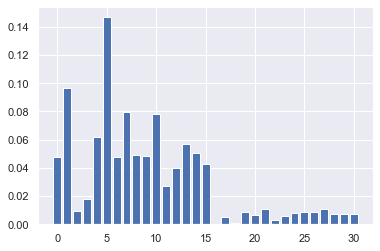

In [289]:
#Gráfico das importância de cada variável para o modelo
plt.bar(range(len(rfc.feature_importances_)), rfc.feature_importances_)
plt.show()

## Retorno a construção do modelo

In [290]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = rfc.predict(X_test)

acuracia = rfc.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, rfc.predict(X_test)))

O modelo obteve 0.8065 de acurácia.
[[450  34]
 [ 96  92]]


### Validação Cruzada

In [291]:
# Validação cruzada, testando em 5 modelos
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
SEED = 42
np.random.seed(SEED)
model = rfc
results = cross_val_score(model, X_train, 
                          y_train, cv = 5, scoring = 'accuracy')
def intervalo(results):
    mean = results.mean()
    dv = results.std()
    print('Acurácia média: {:.2f}%'.format(mean*100))
    print('Intervalo de acurácia: [{:.2f}% ~ {:.2f}%]'
           .format((mean - 2*dv)*100, (mean + 2*dv)*100))
intervalo(results)
cv = results.mean()

Acurácia média: 81.95%
Intervalo de acurácia: [79.40% ~ 84.50%]


### Curva ROC

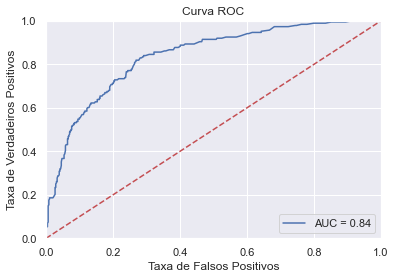

In [292]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = rfc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o gráfico

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [293]:
#Teste ROC
y_predict = rfc.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
roc_teste

0.7095568841216809

### Acurácia Cutoff

In [294]:
# Calculando a Acurácia Cutoff
y_logistic_train = rfc.predict(X_test)
prob_logistic_train = rfc.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[412   0]
 [134 126]]
0.7619047619047619


# Matriz de Confusão

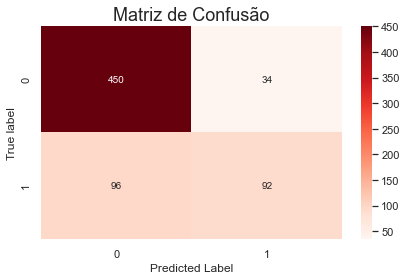

In [295]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = RFC()
y_pred = cross_val_predict(rfc, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_logistic_train), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

### PRECISION

In [296]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.6964285714285714

### RECALL

In [297]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.4148936170212766

### KS

In [298]:
# Construindo a função para calcular o KS
def ks1(modelo, X, Y):
    #predicao das classes positivas (1) da variável resposta
    preds_pos = modelo.predict_proba(X)[:,1] 
    #separa as probabilidades dado que o evento realmente ocorreu, e dado que o evento não ocorreu
    pos_preds_pos = preds_pos[Y == 1]
    nul_preds_pos = preds_pos[Y == 0]
    #calcula o ks, criando as distribuições acumuladas, e encontrando o ponto maior diferenciação entre elas
    ks = ks_2samp(pos_preds_pos, nul_preds_pos)
    return(ks.statistic)

In [299]:
# Retornando o valor do KS tanto para treino quanto para teste
ks_train = ks1(rfc, X_train, y_train)
ks_test = ks1(rfc, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.995640802092415
Ks Amostra de Teste:  0.5505538948478987


In [300]:
#Alimentando a tabela de métricas
d = {'Modelo': ['Random Forest 2'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940
0,AdaBoost,0.882440,0.869917,0.689729,0.567164,0.400000,0.563276,0.769345
0,Random Forest 2,0.806548,0.819523,0.709557,0.696429,0.414894,0.550554,0.761905


## Construção do Modelo de Regressão Logística

In [301]:
# Definindo os parâmetros do modelo de Regressão Logística
rl = reglog( solver='liblinear')

# Realizando o fit dos modelos com as obervações de treino
rl.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [302]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = rl.predict(X_test)

acuracia = rl.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, rl.predict(X_test)))

O modelo obteve 0.7545 de acurácia.
[[447  37]
 [128  60]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [303]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = rl
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 78.96%
Intervalo de acurácia: [74.65% ~ 83.26%]


### Curva ROC

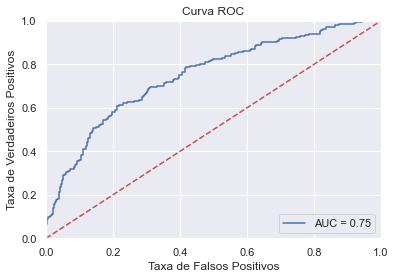

In [304]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = rl.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [305]:
y_predict = rl.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.6214


### Matriz de Confusão

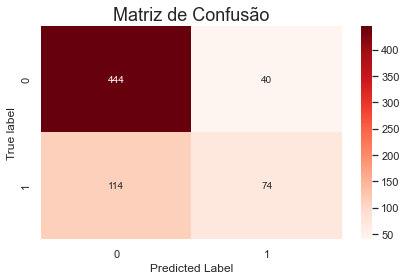

In [306]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = rl
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

### PRECISION

In [307]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.6491228070175439

### RECALL

In [308]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.39361702127659576

### KS

In [309]:
ks_train = ks1(rl, X_train, y_train)
ks_test = ks1(rl, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.42786200498253213
Ks Amostra de Teste:  0.39357306136803233


### CUTOFF

In [310]:
# Calculando a Acurácia Cutoff
y_logistic_train = rl.predict(X_test)
prob_logistic_train = rl.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[393   0]
 [182  97]]
0.6919642857142857


In [311]:
#Alimentando a tabela de métricas
d = {'Modelo': ['Regressão Logística 2'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940
0,AdaBoost,0.882440,0.869917,0.689729,0.567164,0.400000,0.563276,0.769345
0,Random Forest 2,0.806548,0.819523,0.709557,0.696429,0.414894,0.550554,0.761905
0,Regressão Logística 2,0.754464,0.789553,0.621351,0.649123,0.393617,0.393573,0.691964


## Construção do Modelo Gradient Boosting

In [312]:
# Definindo os parâmetros do modelo de Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0,min_samples_split=2,max_depth=5)

# Realizando o fit dos modelos com as obervações de treino
gbc.fit(X_train,y_train)

GradientBoostingClassifier(max_depth=5, random_state=0)

In [313]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = gbc.predict(X_test)

acuracia = gbc.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, gbc.predict(X_test)))

O modelo obteve 0.8021 de acurácia.
[[441  43]
 [ 90  98]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [314]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = gbc
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 81.64%
Intervalo de acurácia: [76.87% ~ 86.40%]


### Curva ROC

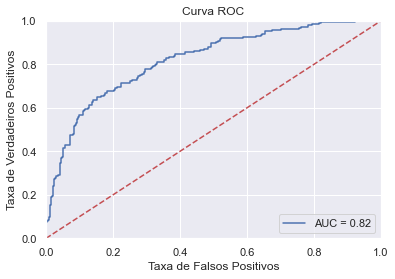

In [315]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = gbc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [316]:
y_predict = rl.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.6214


### Matriz de Confusão

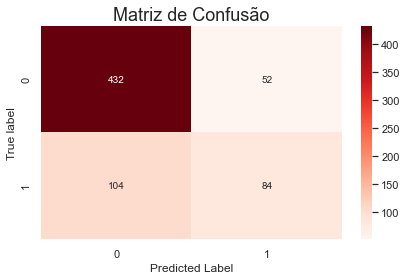

In [317]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = gbc
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

### PRECISION

In [318]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.6176470588235294

### RECALL

In [319]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.44680851063829785

### KS

In [320]:
ks_train = ks1(gbc, X_train, y_train)
ks_test = ks1(gbc, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.9691832664784928
Ks Amostra de Teste:  0.4978020045718305


### CUTOFF

In [321]:
# Calculando a Acurácia Cutoff
y_logistic_train = gbc.predict(X_test)
prob_logistic_train = gbc.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[404   0]
 [127 141]]
0.7291666666666666


In [322]:
#Alimentando a tabela de métricas
d = {'Modelo': ['Gradient Boosting 2'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940
0,AdaBoost,0.882440,0.869917,0.689729,0.567164,0.400000,0.563276,0.769345
0,Random Forest 2,0.806548,0.819523,0.709557,0.696429,0.414894,0.550554,0.761905
0,Regressão Logística 2,0.754464,0.789553,0.621351,0.649123,0.393617,0.393573,0.691964
0,Gradient Boosting 2,0.802083,0.816351,0.621351,0.617647,0.446809,0.497802,0.729167


## Construindo Modelo de XGBoost

In [323]:
# Definindo os parâmetros do modelo de XGBoost
xgb = XGBClassifier(n_estimators=200, learning_rate=0.09, random_state=42,eval_metric='logloss', use_label_encoder=False)

# Realizando o fit dos modelos com as obervações de treino
xgb.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.09, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, random_state=42, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [324]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = xgb.predict(X_test)

acuracia = xgb.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, xgb.predict(X_test)))

O modelo obteve 0.8021 de acurácia.
[[438  46]
 [ 87 101]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [325]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = xgb
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 81.44%
Intervalo de acurácia: [75.95% ~ 86.93%]


### Curva ROC

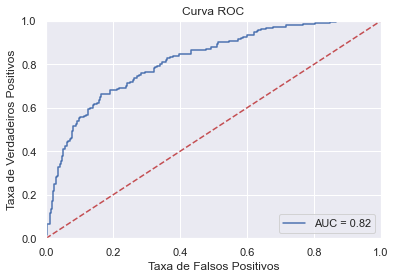

In [326]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = xgb.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [327]:
y_predict = xgb.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.7211


### Matriz de Confusão

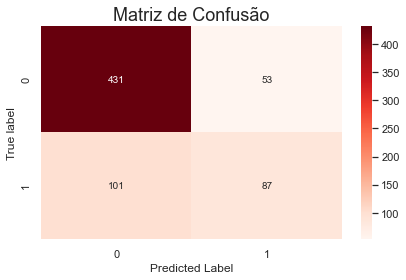

In [328]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = xgb
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

### PRECISION

In [329]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.6214285714285714

### RECALL

In [330]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.4627659574468085

### KS

In [331]:
ks_train = ks1(xgb, X_train, y_train)
ks_test = ks1(xgb, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.995640802092415
Ks Amostra de Teste:  0.5016704765254089


### CUTOFF

In [332]:
# Calculando a Acurácia Cutoff
y_logistic_train = xgb.predict(X_test)
prob_logistic_train = xgb.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[406   0]
 [119 147]]
0.7380952380952381


In [333]:
#Alimentando a tabela de métricas
d = {'Modelo': ['XGBoost 2'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940
0,AdaBoost,0.882440,0.869917,0.689729,0.567164,0.400000,0.563276,0.769345
0,Random Forest 2,0.806548,0.819523,0.709557,0.696429,0.414894,0.550554,0.761905
0,Regressão Logística 2,0.754464,0.789553,0.621351,0.649123,0.393617,0.393573,0.691964
0,Gradient Boosting 2,0.802083,0.816351,0.621351,0.617647,0.446809,0.497802,0.729167
0,XGBoost 2,0.802083,0.814436,0.721096,0.621429,0.462766,0.501670,0.738095


## Construção do Modelo de AdaBoost

In [334]:
# Definindo os parâmetros do modelo de XGBoost
abc = AdaBoostClassifier(n_estimators=200, learning_rate=1.0, random_state=42)

# Realizando o fit dos modelos com as obervações de treino
abc.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=200, random_state=42)

In [335]:
# Testando o modelo e criando o vetor de predições (y_pred), para medir a acurácia
y_pred = abc.predict(X_test)

acuracia = abc.score(X_test, y_test)
print('O modelo obteve %0.4f de acurácia.' % acuracia)

print(confusion_matrix(y_test, abc.predict(X_test)))

O modelo obteve 0.7887 de acurácia.
[[435  49]
 [ 93  95]]


### Validação cruzada, utilizando o kfold para aleatorizar as observações

In [336]:
# Calculando a acurácia utilizando a validação cruzada
# Validação seleciona partes do banco e roda o modelo para entender o comportamento deste em cenários diferentes.
np.random.seed(SEED)
cv = KFold(n_splits = 5, shuffle = True)
model = abc
results = cross_val_score(model, X_train, y_train, cv = cv)
intervalo(results)

Acurácia média: 79.59%
Intervalo de acurácia: [75.24% ~ 83.95%]


### Curva ROC

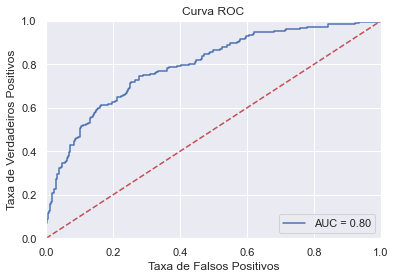

In [337]:
# Calculando a taxa de verdadeiros positivos e negativos, para criar a curva roc
probs = abc.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# Plotando o Gráfico
plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.xlabel('Taxa de Falsos Positivos')
plt.show()

#### A curva roc mostra o quão bem o modelo está separando os grupos das respostas, quando mais longe da linha vermelha, melhor o modelo está separando

In [338]:
y_predict = abc.predict(X_test)
roc_teste = roc_auc_score(y_test, y_predict)
print('ROC: %0.4f' %roc_teste)

ROC: 0.7020


### Matriz de Confusão

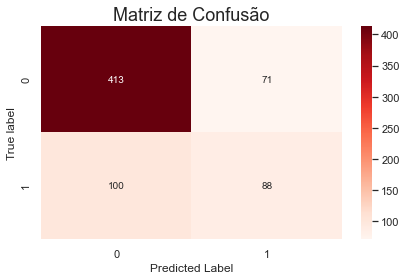

In [339]:
# Construindo a matriz de confusão com os valores preditos pelos modelo
np.random.seed(SEED)
cv = StratifiedKFold(n_splits = 5, shuffle = True)
model = abc
y_pred = cross_val_predict(model, X_test, y_test, cv = cv)
fig, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, 
            ax=ax, fmt='d', cmap='Reds')
ax.set_title("Matriz de Confusão", fontsize=18)
ax.set_ylabel("True label")
ax.set_xlabel("Predicted Label")
plt.tight_layout()

### PRECISION

In [340]:
# Calculando a precisão do modelo, quanto mais perto de 1 menor o número de falsos negativos
precision = precision_score(y_test, y_pred)
precision

0.5534591194968553

### RECALL

In [341]:
# Calculando o recall do modelo, quanto mais perto de 1 menor o número de falsos positivos
recall = recall_score(y_test, y_pred)
recall

0.46808510638297873

### KS

In [342]:
ks_train = ks1(abc, X_train, y_train)
ks_test = ks1(abc, X_test, y_test)

print('Ks Amostra de Treino: ', ks_train)
print('Ks Amostra de Teste: ', ks_test)

Ks Amostra de Treino:  0.7048833370954282
Ks Amostra de Teste:  0.4678213469315984


### CUTOFF

In [343]:
# Calculando a Acurácia Cutoff
y_logistic_train = abc.predict(X_test)
prob_logistic_train = abc.predict_proba(X_test)[:,1]
threshold = Find_Optimal_Cutoff(y_test, prob_logistic_train)
base = pd.DataFrame(data=threshold.values, columns=['threshold'])
threshold = base['threshold'][0]

y_predict_cutoff = np.where(prob_logistic_train >= threshold, 1, 0)

print(confusion_matrix(y_predict_cutoff, y_logistic_train))

acuracia_cutoff = accuracy_score(y_test, y_predict_cutoff)
print(acuracia_cutoff)

[[406   0]
 [122 144]]
0.7321428571428571


In [344]:
#Alimentando a tabela de métricas
d = {'Modelo': ['AdaBoost 2'], 'Acuracia': [acuracia],'CV': [results.mean()], 'ROC': [roc_teste],
     'Precision': [precision], 'Recall': [recall], 'KS': [ks_test],'acuracia_cutoff':[acuracia_cutoff]}
df2 = pd.DataFrame(data=d)
metricas = metricas.append(df2)
metricas

,Modelo,Acuracia,CV,ROC,Precision,Recall,KS,acuracia_cutoff
0,Random Forest,0.876488,0.883938,0.624710,0.705882,0.126316,0.587212,0.773810
0,Regressão Logística,0.866071,0.852038,0.583472,0.555556,0.210526,0.487658,0.724702
0,Gradient Boosting,0.877976,0.882005,0.583472,0.600000,0.315789,0.601587,0.779762
0,XGBoost,0.876488,0.883291,0.677470,0.645833,0.326316,0.640810,0.819940
0,AdaBoost,0.882440,0.869917,0.689729,0.567164,0.400000,0.563276,0.769345
0,Random Forest 2,0.806548,0.819523,0.709557,0.696429,0.414894,0.550554,0.761905
0,Regressão Logística 2,0.754464,0.789553,0.621351,0.649123,0.393617,0.393573,0.691964
0,Gradient Boosting 2,0.802083,0.816351,0.621351,0.617647,0.446809,0.497802,0.729167
0,XGBoost 2,0.802083,0.814436,0.721096,0.621429,0.462766,0.501670,0.738095
0,AdaBoost 2,0.788690,0.795946,0.702040,0.553459,0.468085,0.467821,0.732143


#### Assumindo as campanhas como similares e redesenhando o target, temos que a acurácia diminui um pouco, porém a Precisão e o Recall aumentam, como são métricas complementares, temos um resultado bom. O teste ROC também aumenta um pouco e o modelo converte com uma probabilidade menor.

#### Alguns pontos melhoram o desempenho do modelo, com uma visão mais macro, temos que é algo a ser estudado e que pode melhorar a calibragem.